##Imports and downloading dataset

In [ ]:
import os
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense
import tensorflow
import tensorflow.keras
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers
import keras
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization,MaxPooling1D
import seaborn as sns
import random
random.seed(42)

In [ ]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle_ds"

In [ ]:
if not os.path.exists('/content/drive/MyDrive/Kaggle_ds/'):
    os.makedirs('/content/drive/MyDrive/Kaggle_ds/')
    %cd /content/drive/MyDrive/Kaggle_ds/

In [ ]:
%cd /content/drive/MyDrive/Kaggle_ds/

/content/drive/MyDrive/Kaggle_ds


In [ ]:
%ls /content/drive/MyDrive/Kaggle_ds/

Crema/                           features/     hi_.csv
CREMA_df_features.csv            features.npy  kaggle.json
CREMA_df_features_mfcc20csv.csv  hi.csv


In [ ]:
# !kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en --unzip

In [ ]:
CREMA = '/content/drive/MyDrive/Kaggle_ds/Crema/'
%cd /content/drive/MyDrive/Kaggle_ds/Crema

/content/drive/MyDrive/Kaggle_ds/Crema


In [ ]:
#Get all filenames into a list
dir_list = os.listdir('/content/drive/MyDrive/Kaggle_ds/Crema/')
dir_list.sort()
dir_list[:5]

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav']

In [ ]:
%ls /content/drive/MyDrive/Kaggle_ds/Crema/

1001_DFA_ANG_XX.wav  1031_IWL_ANG_XX.wav  1061_TAI_HAP_XX.wav
1001_DFA_DIS_XX.wav  1031_IWL_DIS_XX.wav  1061_TAI_NEU_XX.wav
1001_DFA_FEA_XX.wav  1031_IWL_FEA_XX.wav  1061_TAI_SAD_XX.wav
1001_DFA_HAP_XX.wav  1031_IWL_HAP_XX.wav  1061_TIE_ANG_XX.wav
1001_DFA_NEU_XX.wav  1031_IWL_NEU_XX.wav  1061_TIE_DIS_XX.wav
1001_DFA_SAD_XX.wav  1031_IWL_SAD_XX.wav  1061_TIE_FEA_XX.wav
1001_IEO_ANG_HI.wav  1031_IWW_ANG_XX.wav  1061_TIE_HAP_XX.wav
1001_IEO_ANG_LO.wav  1031_IWW_DIS_XX.wav  1061_TIE_NEU_XX.wav
1001_IEO_ANG_MD.wav  1031_IWW_FEA_XX.wav  1061_TIE_SAD_XX.wav
1001_IEO_DIS_HI.wav  1031_IWW_HAP_XX.wav  1061_TSI_ANG_XX.wav
1001_IEO_DIS_LO.wav  1031_IWW_NEU_XX.wav  1061_TSI_DIS_XX.wav
1001_IEO_DIS_MD.wav  1031_IWW_SAD_XX.wav  1061_TSI_FEA_XX.wav
1001_IEO_FEA_HI.wav  1031_MTI_ANG_XX.wav  1061_TSI_HAP_XX.wav
1001_IEO_FEA_LO.wav  1031_MTI_DIS_XX.wav  1061_TSI_NEU_XX.wav
1001_IEO_FEA_MD.wav  1031_MTI_FEA_XX.wav  1061_TSI_SAD_XX.wav
1001_IEO_HAP_HI.wav  1031_MTI_HAP_XX.wav  1061_WSI_ANG_XX.wav
1001_IEO

## Exploring Datasets and Visualizing Waveform

In [ ]:
emotionG_label = []
gender = []
emotion = []
path = []
female_ids = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,
              1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,
              1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,
              1082,1084,1089,1091]

temp_dict = {"SAD":"sad", "ANG": "angry", "DIS":"disgust", "FEA":"fear",
             "HAP":"happy", "NEU":"neutral"}

def get_emotion_crema(filename, ids=female_ids, dc=temp_dict):
  filename = filename.split("_")
  emotionG1 = dc[filename[2]]
  if int(filename[0]) in ids:
    emotionG2 = "_female"
  else:
    emotionG2 = "_male"
  emotionG_label = emotionG1 + emotionG2
  return (emotionG_label, emotionG1, emotionG2[1:])


for i in dir_list:
  emotionG_label.append(get_emotion_crema(i)[0])
  emotion.append(get_emotion_crema(i)[1])
  gender.append(get_emotion_crema(i)[2])
  path.append(i)

In [ ]:
CREMA_df = pd.DataFrame(emotionG_label, columns = ['emotionG_label'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(gender, columns = ['gender'])],axis=1)
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(emotion, columns = ['emotion'])],axis=1)
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)

In [ ]:
CREMA_df.head()

emotionG_label source gender  emotion                 path
0     angry_male  CREMA   male    angry  1001_DFA_ANG_XX.wav
1   disgust_male  CREMA   male  disgust  1001_DFA_DIS_XX.wav
2      fear_male  CREMA   male     fear  1001_DFA_FEA_XX.wav
3     happy_male  CREMA   male    happy  1001_DFA_HAP_XX.wav
4   neutral_male  CREMA   male  neutral  1001_DFA_NEU_XX.wav

In [ ]:
CREMA_df.emotionG_label.value_counts()

angry_male        671
disgust_male      671
fear_male         671
happy_male        671
sad_male          671
angry_female      600
disgust_female    600
fear_female       600
happy_female      600
sad_female        600
neutral_male      575
neutral_female    512
Name: emotionG_label, dtype: int64

In [ ]:
CREMA_df.head()

emotionG_label source gender  emotion                 path
0     angry_male  CREMA   male    angry  1001_DFA_ANG_XX.wav
1   disgust_male  CREMA   male  disgust  1001_DFA_DIS_XX.wav
2      fear_male  CREMA   male     fear  1001_DFA_FEA_XX.wav
3     happy_male  CREMA   male    happy  1001_DFA_HAP_XX.wav
4   neutral_male  CREMA   male  neutral  1001_DFA_NEU_XX.wav

In [ ]:
CREMA_df_summary = CREMA_df.pivot_table(index='emotion', columns='gender', aggfunc=len, values = 'source')
CREMA_df_summary

gender   female  male
emotion              
angry       600   671
disgust     600   671
fear        600   671
happy       600   671
neutral     512   575
sad         600   671

<Axes: ylabel='emotion'>

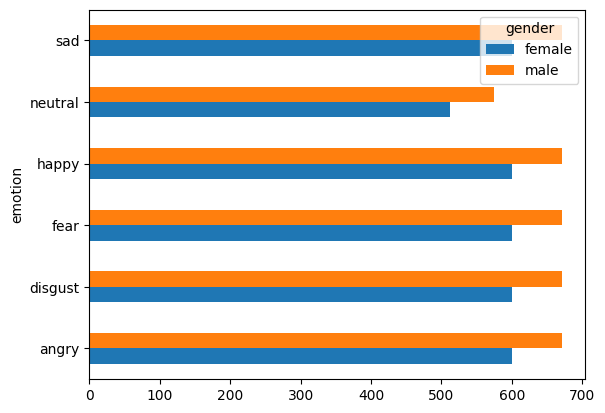

In [ ]:
CREMA_df_summary.plot(kind='barh')

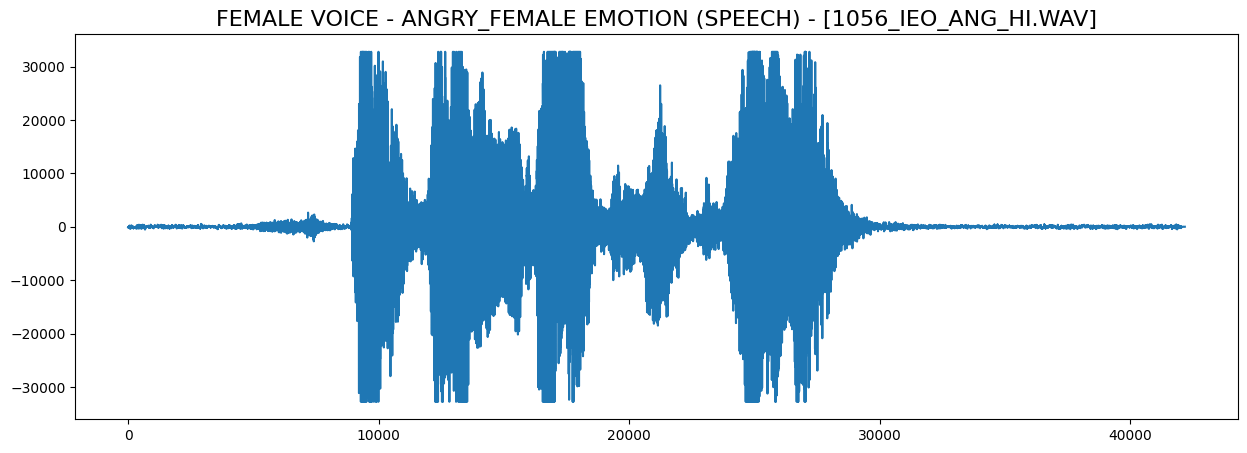

In [ ]:
n_files = CREMA_df.shape[0]

# choose random number
rnd = np.random.randint(0,n_files)

# use the Librosa library to load and plot the random speech

fname = CREMA_df.path[rnd]
sampling_rate, data = wavfile.read(fname)

plt.figure(figsize=(15, 5))
info = CREMA_df.iloc[rnd].values
title_txt = f'{info[2]} voice - {info[0]} emotion (speech) - [{os.path.basename(fname)}]'
plt.title(title_txt.upper(), size=16)
plt.plot(data)

# play the audio
ipd.Audio(fname)

 Sad 


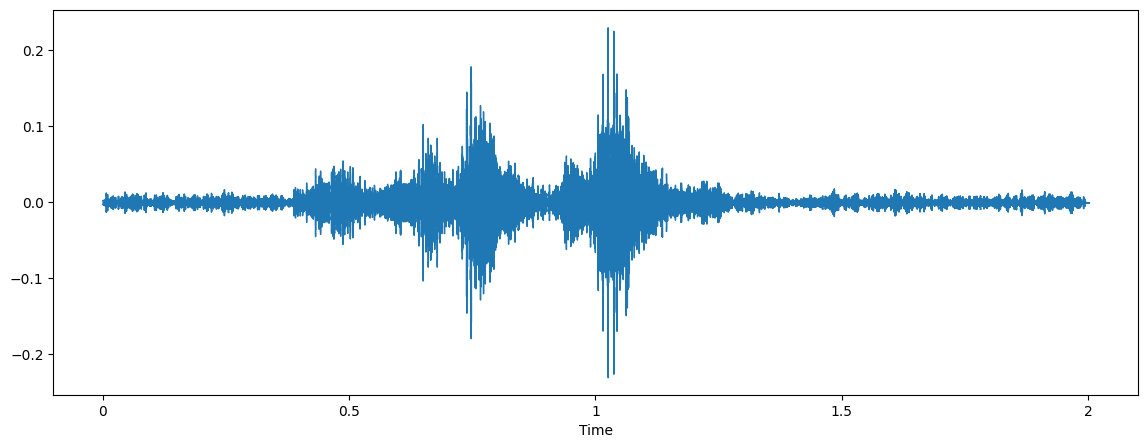



 Angry 


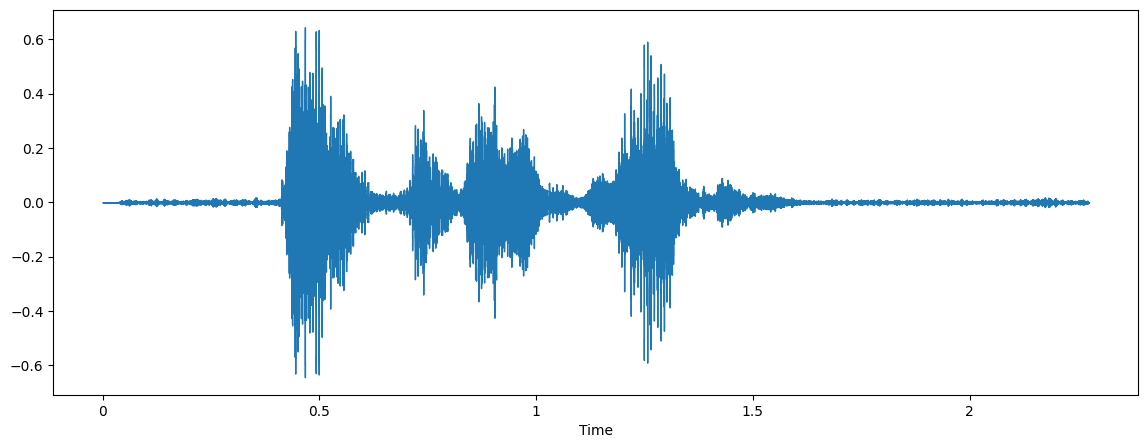



 Disgust 


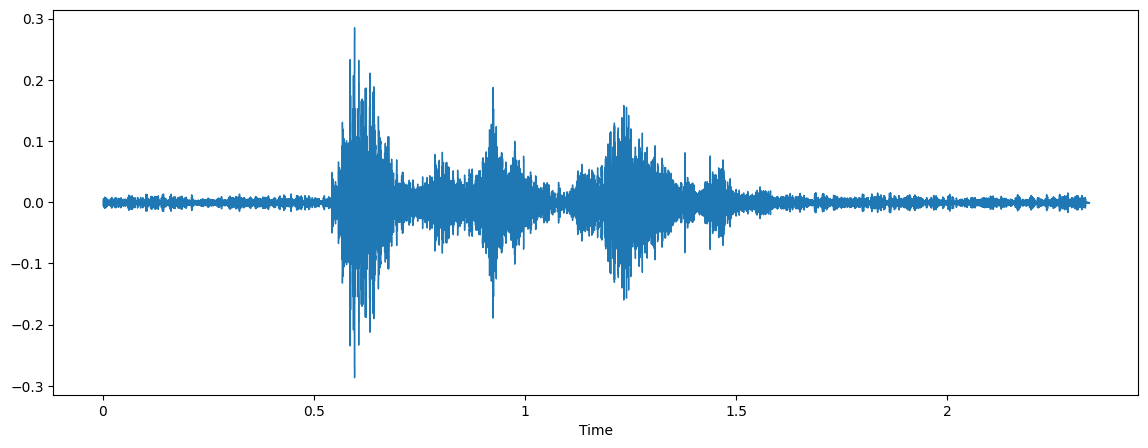



 Fear 


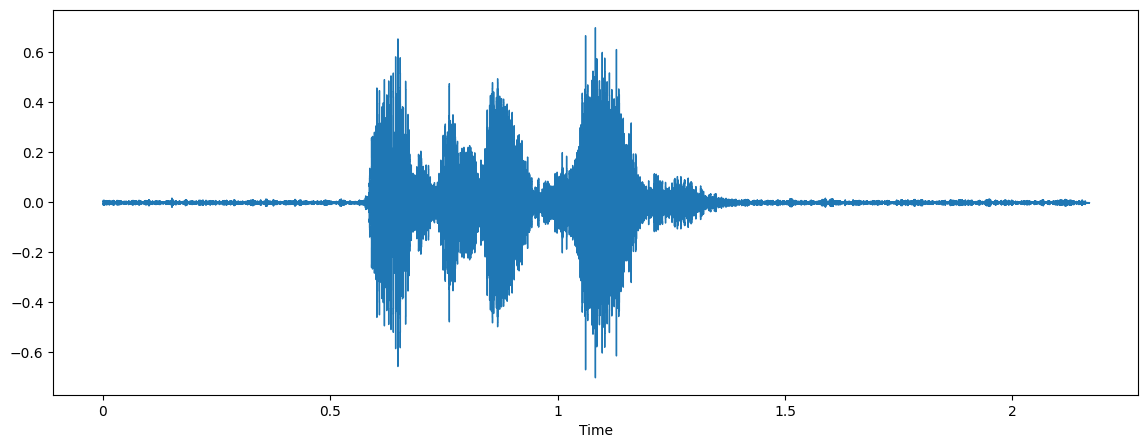



 Happy 


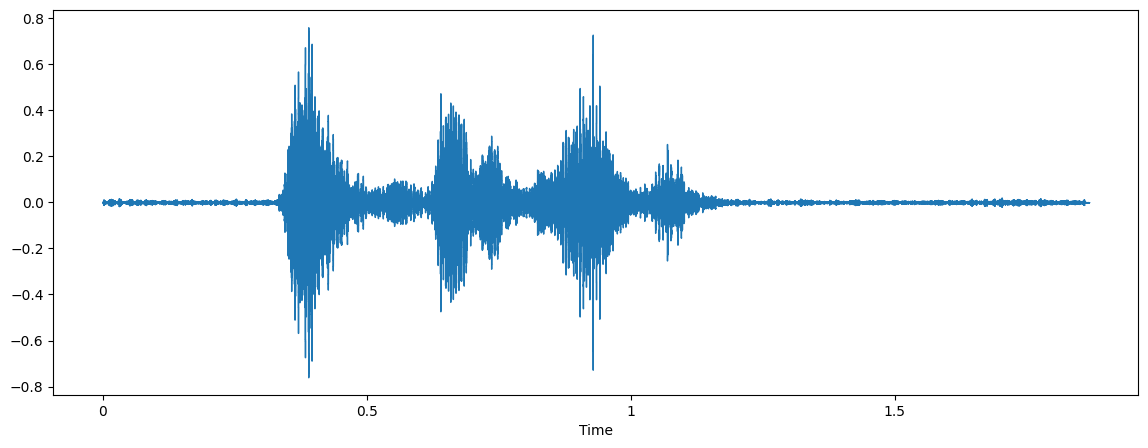



 Neutral 


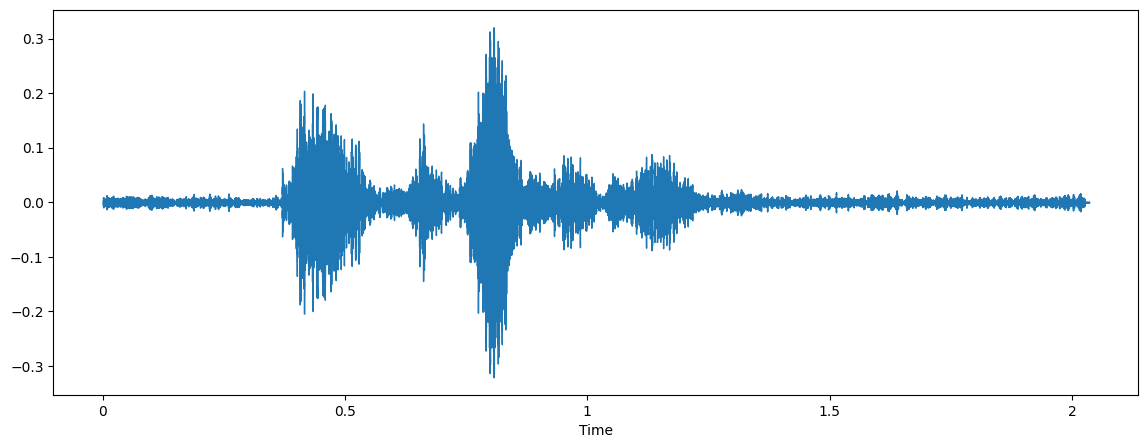

In [ ]:
def display_audio(aud_name):
  path= '/content/drive/MyDrive/Kaggle_ds/Crema/'+aud_name
  x, sr = librosa.load(path)
  ipd.display(ipd.Audio(x, rate=sr))
  plt.figure(figsize=(14, 5))
  librosa.display.waveshow(x, sr=sr)
  plt.show()


# sad
print(" Sad ")
display_audio('1001_DFA_SAD_XX.wav')
# angry
print("\n\n Angry ")
display_audio('1001_DFA_ANG_XX.wav')
# disgust
print("\n\n Disgust ")
display_audio('1001_DFA_DIS_XX.wav')
# fear
print("\n\n Fear ")
display_audio('1001_DFA_FEA_XX.wav')
# happy
print("\n\n Happy ")
display_audio('1001_DFA_HAP_XX.wav')
# neutral
print("\n\n Neutral ")
display_audio('1001_DFA_NEU_XX.wav')

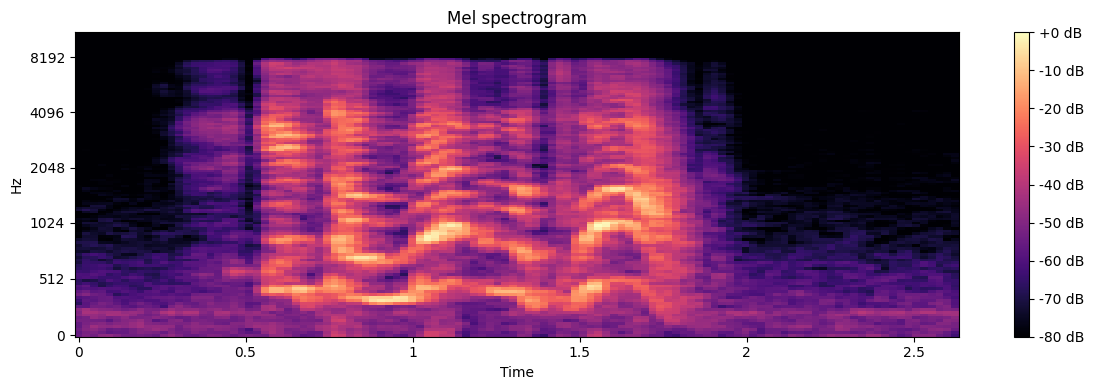

In [ ]:
fname = CREMA_df.path[rnd]
y, sr = librosa.load(fname)

# Compute mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to log scale (dB) using the peak power as reference
log_S = librosa.power_to_db(S, ref=np.max)

# Plot mel spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

In [ ]:
!pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.3 MB/s eta 0:00:00


In [ ]:
!pip install librosa --upgrade
!pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


## Feature space

### Feature Extraction

In [ ]:
from tqdm import tqdm


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Spectral Features from librosa
def zero_crossing_rate(frame):
    return np.mean(librosa.feature.zero_crossing_rate(frame).T,axis=0)

def energy(frame):
    return np.mean(librosa.feature.rms(y=frame).T, axis=0)

def chroma_shift(frame,sample_rate):
    stft=np.abs(librosa.stft(frame))
    chroma=librosa.feature.chroma_stft(S=stft, sr=sample_rate)
    return np.mean(chroma.T,axis=0)

def mfcc(frame,sample_rate,n=100):
    mfccs = librosa.feature.mfcc(y=frame, sr = sample_rate, n_mfcc = n)
    return np.mean(mfccs, axis = 1)

def melspectrogram(frame,sample_rate):
    return np.mean(librosa.feature.melspectrogram(y=frame,sr=sample_rate).T,axis=0)

def spectral_centroid(frame,sample_rate):
    return np.mean(librosa.feature.spectral_centroid(y=frame,sr=sample_rate).T,axis=0)

def spectral_bandwidth(frame,sample_rate):
    return np.mean(librosa.feature.spectral_bandwidth(y=frame,sr=sample_rate).T,axis=0)

def spectral_rolloff(frame,sample_rate):
    return np.mean(librosa.feature.spectral_rolloff(y=frame,sr=sample_rate).T,axis=0)

def spectral_contrast(frame,sample_rate):
    return np.mean(librosa.feature.spectral_contrast(y=frame,sr=sample_rate).T,axis=0)

def spectral_flatness(frame):
    return np.mean(librosa.feature.spectral_flatness(y=frame).T,axis=0)

def poly_features(frame,sample_rate):
    return np.mean(librosa.feature.poly_features(y=frame,sr=sample_rate).T,axis=0)

def tonnetz(frame,sample_rate):
    return np.mean(librosa.feature.tonnetz(y=frame, sr=sample_rate).T, axis=0)

# mean of the fundamental frequency
def fundamental_frequency(frame):
    return np.mean(librosa.yin(frame, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7')))


# Extracting the features from the audio files
def extract_features(file_name,n=100):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        # Extracting different features from the audio file
        tonnetz_ = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio),
    sr=sample_rate).T,axis=0)
        # print("tonnetz shape=",tonnetz_.shape)
        # print("tonnetz_ ", tonnetz_)
        zero_crossing_rate_ = zero_crossing_rate(audio)
        # print("zcr shape=",zero_crossing_rate_.shape)
        # print("zero_crossing_rate_ ", zero_crossing_rate_)
        energy_ = energy(audio)
        # print("energy shape=",energy_.shape)
        # print("energy_ ", energy_)
        sample_rate = np.array(sample_rate)

        chroma_shift_ = chroma_shift(audio, sample_rate)
        # print("chroma_shift shape=",chroma_shift_.shape)
        # print("chroma_energy_normalized_ ", chroma_shift_)
        mfcc_ = mfcc(audio, sample_rate,n=n)
        # print("mfcc shape=",mfcc_.shape)
        # print("mfcc_ ", mfcc_)
        melspectrogram_ = melspectrogram(audio, sample_rate)
        # print("melspectrogram_ ", melspectrogram_.shape)
        spectral_centroid_ = spectral_centroid(audio, sample_rate)
        # print("spectral_centroid_ ", spectral_centroid_.shape)
        spectral_bandwidth_ = spectral_bandwidth(audio, sample_rate)
        # print("spectral_bandwidth_ ", spectral_bandwidth_.shape)
        spectral_rolloff_ = spectral_rolloff(audio, sample_rate)
        # print("spectral_rolloff_ ", spectral_rolloff_.shape)
        spectral_contrast_ = spectral_contrast(audio, sample_rate)
        # print("spectral_contrast_ ", spectral_contrast_.shape)
        spectral_flatness_ = spectral_flatness(audio)
        # print("spectral_flatness_ ", spectral_flatness_.shape)
        poly_features_ = poly_features(audio, sample_rate)
        # print("poly_features_ ", poly_features_.shape)

        fundamental_frequency_ = fundamental_frequency(audio)
        # print("fundamental_frequency_ ", fundamental_frequency_.shape)


        # Concatenating all the features into one array
        features = np.array([])
        features = np.hstack((features, zero_crossing_rate_))
        features = np.hstack((features, energy_))
        features = np.hstack((features, chroma_shift_))
        features = np.hstack((features, mfcc_))
        features = np.hstack((features, melspectrogram_))
        features = np.hstack((features, spectral_centroid_))
        features = np.hstack((features, spectral_bandwidth_))
        features = np.hstack((features, spectral_rolloff_))
        features = np.hstack((features, spectral_contrast_))
        features = np.hstack((features, spectral_flatness_))
        features = np.hstack((features, poly_features_))
        features = np.hstack((features, tonnetz_))
        features = np.hstack((features, fundamental_frequency_))
        # print("features ", features)
        label= file_name.split('/')[-1].split('_')[2]
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e)
        return None, None

    return features, label

# get features for all the files in the dataset
def get_features(path,n=100):
    # create an empty list to store the features and labels
    # features = np.empty((0, 182))
    features = np.empty((0, 262))
    labels = np.empty((0,1))
    # iterate over all the files in each folder
    for file_name in tqdm(path):

        # get features for one file
        # print("file_name ", file_name)
        feature, label = extract_features(file_name,n=n)


        # print("feature ", feature)
        # print("Feature shape ", feature.shape)
        # print("label ", label)
        # store the extracted features and labels
        features = np.vstack((features, feature))

        # print("Features shape ", features.shape)
        labels=np.vstack((labels,label))
        # print(labels)
        # print(labels.shape)
        # store the result in list
    return features, labels


In [ ]:

path_in_drive = '/content/drive/MyDrive/Kaggle_ds/Crema/'
path = [path_in_drive + i for i in CREMA_df.path]
# get features and labels
features, labels = get_features(path)

CREMA_df_features = pd.DataFrame(features)
CREMA_df_features['labels'] = labels
# store the result in csv file in drive
path = '/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv'
CREMA_df_features.to_csv(path, index=False)

100%|██████████| 7442/7442 [01:50:36<00:00:00, 1.39it/s]


https://drive.google.com/file/d/14lXlX-okSESvHEFMDhoxONdPydikplY7/view?usp=sharing Link to features extracted where mfcc n=100

In [ ]:
path_in_drive = '/content/drive/MyDrive/Kaggle_ds/Crema/'
path = [path_in_drive + i for i in CREMA_df.path]
# get features and labels
features, labels = get_features(path,n=20)

CREMA_df_features_mfcc20 = pd.DataFrame(features)
CREMA_df_features_mfcc20['labels'] = labels
# store the result in csv file in drive
path = '/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_mfcc20.csv'
CREMA_df_features_mfcc20.to_csv(path, index=False)

100%|██████████| 7442/7442 [01:59:56<00:00:00, 1.33it/s]


https://drive.google.com/file/d/1aT7zjsNBp5-1wH5glZ5Rdwtc8ng6wIs3/view?usp=sharing Link to features extracted where mfcc n=20

###Data augmentation

In [ ]:
def noise(data):
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift=shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

In [ ]:
!pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import soundfile as sf
def augment_data(filepath):
    if not os.path.exists('/content/drive/MyDrive/Kaggle_ds/Crema_aug/'):
        os.makedirs('/content/drive/MyDrive/Kaggle_ds/Crema_aug/')
    types = ['_noise', '_stretch', '_shift', '_pitch']
    for i in tqdm(range(len(filepath))):
        data, sampling_rate = librosa.load(filepath[i])
        augmented_data = []
        # augmented_data.append(data)
        augmented_data.append(noise(data))
        augmented_data.append(stretch(data))
        augmented_data.append(shift(data))
        augmented_data.append(pitch(data, sampling_rate))
        for j in range(len(augmented_data)):
            # get old file name and add new suffix
            old_filename = filepath[i].split('/')[-1].split('.')[0]
            # replace Crema with Crema_aug
            new_filepath = '/content/drive/MyDrive/Kaggle_ds/Crema_aug/'
            new_filename = new_filepath + os.path.basename(filepath[i]).split('.')[0] + types[j] + '.wav'
            # print("Saving augmented audio to: ", new_filename)
            sf.write(new_filename, augmented_data[j], sampling_rate)


In [ ]:
path_in_drive = '/content/drive/MyDrive/Kaggle_ds/Crema/'
path = [path_in_drive + i for i in CREMA_df.path]
augment_data(path)


100%|██████████| 7442/7442 [12:53<00:00, 7.82it/s]



In [ ]:
# get noise audio files
path_in_drive = '/content/drive/MyDrive/Kaggle_ds/Crema_aug/'
path = [path_in_drive + i for i in os.listdir(path_in_drive) if 'noise' in i]
# get features and labels
features, labels = get_features(path)
CREMA_df_features_noise = pd.DataFrame(features)
CREMA_df_features_noise['labels'] = labels
# store the result in csv file in drive
path = '/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_noise.csv'
CREMA_df_features_noise.to_csv(path, index=False)

100%|██████████| 7442/7442 [01:12:53<00:00:00, 1.21it/s]


In [ ]:
# get stretch audio files
path_in_drive = '/content/drive/MyDrive/Kaggle_ds/Crema_aug/'
path = [path_in_drive + i for i in os.listdir(path_in_drive) if 'stretch' in i]
# get features and labels
features, labels = get_features(path)
CREMA_df_features_stretch = pd.DataFrame(features)
CREMA_df_features_stretch['labels'] = labels
# store the result in csv file in drive
path = '/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_stretch.csv'
CREMA_df_features_stretch.to_csv(path, index=False)


100%|██████████| 7442/7442 [01:12:01<00:00:00, 1.191it/s]


In [ ]:
# get shift audio files
path_in_drive = '/content/drive/MyDrive/Kaggle_ds/Crema_aug/'
path = [path_in_drive + i for i in os.listdir(path_in_drive) if 'shift' in i]

# get features and labels
features, labels = get_features(path)
CREMA_df_features_shift = pd.DataFrame(features)
CREMA_df_features_shift['labels'] = labels

# store the result in csv file in drive
path = '/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_shift.csv'
CREMA_df_features_shift.to_csv(path, index=False)

100%|██████████| 7442/7442 [01:25:01<00:00:00, 1.151it/s]


In [ ]:
# get pitch audio files
path_in_drive = '/content/drive/MyDrive/Kaggle_ds/Crema_aug/'
path = [path_in_drive + i for i in os.listdir(path_in_drive) if 'pitch' in i]

# get features and labels
features, labels = get_features(path)
CREMA_df_features_pitch = pd.DataFrame(features)
CREMA_df_features_pitch['labels'] = labels

# store the result in csv file in drive
path = '/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_pitch.csv'
CREMA_df_features_pitch.to_csv(path, index=False)


100%|██████████| 7442/7442 [01:20:01<00:00:00, 1.161it/s]


### Feature Selection

In [ ]:
def add_column_names(df,n=100):
    # add column names to the dataframe
    columns=[]
    for i in range(6):
        columns.append('tonnetz_'+str(i))
    columns.append('zero_crossing_rate_')
    columns.append('energy_')
    for i in range(12):
        columns.append('chroma_energy_normalized_'+str(i))
    for i in range(n):
        columns.append('mfcc_'+str(i))
    for i in range(128):
        columns.append('melspectrogram_'+str(i))
    columns.append('spectral_centroid_')
    columns.append('spectral_bandwidth_')
    columns.append('spectral_rolloff_')
    for i in range(7):
        columns.append('spectral_contrast_'+str(i))
    columns.append('spectral_flatness_')
    for i in range(2):
        columns.append('poly_features_'+str(i))
    columns.append('fundamental_frequency_')
    columns.append('labels')

    df.columns=columns
    return df

In [ ]:
def get_from_df(feature,df,n=100):
    # check if last letter is _ or not
    if feature!='labels' and feature[-1]!='_':
        feature=feature+'_'

    if feature=='zero_crossing_rate_':
        return df['zero_crossing_rate_']
    elif feature=='energy_':
        return df['energy_']
    elif feature=='chroma_energy_normalized_':
        chroma_df=pd.DataFrame()
        for i in range(12):
            chroma_df['chroma_energy_normalized_'+str(i)]=df['chroma_energy_normalized_'+str(i)]
        return chroma_df
    elif feature=='mfcc_':
        mfcc_df=pd.DataFrame()
        for i in range(n):
            mfcc_df['mfcc_'+str(i)]=df['mfcc_'+str(i)]
        return mfcc_df
    elif feature=='melspectrogram_':
        melspectrogram_df=pd.DataFrame()
        for i in range(128):
            melspectrogram_df['melspectrogram_'+str(i)]=df['melspectrogram_'+str(i)]
        return melspectrogram_df
    elif feature=='spectral_centroid_':
        return df['spectral_centroid_']
    elif feature=='spectral_bandwidth_':
        return df['spectral_bandwidth_']

    elif feature=='spectral_rolloff_':
        return df['spectral_rolloff_']
    elif feature=='spectral_contrast_':
        spectral_contrast_df=pd.DataFrame()
        for i in range(7):
            spectral_contrast_df['spectral_contrast_'+str(i)]=df['spectral_contrast_'+str(i)]
        return spectral_contrast_df
    elif feature=='spectral_flatness_':
        return df['spectral_flatness_']
    elif feature=='poly_features_':
        poly_features_df=pd.DataFrame()
        for i in range(2):
            poly_features_df['poly_features_'+str(i)]=df['poly_features_'+str(i)]
        return poly_features_df
    elif feature=='tonnetz_':
        tonnetz_df=pd.DataFrame()
        for i in range(6):
            tonnetz_df['tonnetz_'+str(i)]=df['tonnetz_'+str(i)]
        return tonnetz_df
    elif feature=='fundamental_frequency_':
        return df['fundamental_frequency_']
    elif feature=='labels':
        return df['labels']
    else:
        print('Invalid feature name')
        return None

In [ ]:
def features_selector(
        df,
        zrc=False,
        energy=False,
        chroma=False,
        mfcc=False,
        melspectrogram=False,
        spectral_centroid=False,
        spectral_bandwidth=False,
        spectral_rolloff=False,
        spectral_contrast=False,
        spectral_flatness=False,
        poly_features=False,
        tonnetz=False,
        fundamental_frequency=False,
        labels=True,
        n=100
):
    # get all the features
    features=pd.DataFrame()
    if zrc:
        features['zero_crossing_rate_']=get_from_df('zero_crossing_rate_',df)
    if energy:
        features['energy_']=get_from_df('energy_',df)
    if chroma:
        chroma_df=get_from_df('chroma_energy_normalized_',df)
        for i in range(12):
            features['chroma_energy_normalized_'+str(i)]=chroma_df['chroma_energy_normalized_'+str(i)]
    if mfcc:
        mfcc_df=get_from_df('mfcc_',df,n=n)
        for i in range(n):
            features['mfcc_'+str(i)]=mfcc_df['mfcc_'+str(i)]
    if melspectrogram:
        melspectrogram_df=get_from_df('melspectrogram_',df)
        for i in range(128):
            features['melspectrogram_'+str(i)]=melspectrogram_df['melspectrogram_'+str(i)]
    if spectral_centroid:
        features['spectral_centroid_']=get_from_df('spectral_centroid_',df)
    if spectral_bandwidth:
        features['spectral_bandwidth_']=get_from_df('spectral_bandwidth_',df)
    if spectral_rolloff:
        features['spectral_rolloff_']=get_from_df('spectral_rolloff_',df)
    if spectral_contrast:
        spectral_contrast_df=get_from_df('spectral_contrast_',df)
        for i in range(7):
            features['spectral_contrast_'+str(i)]=spectral_contrast_df['spectral_contrast_'+str(i)]
    if spectral_flatness:
        features['spectral_flatness_']=get_from_df('spectral_flatness_',df)
    if poly_features:
        poly_features_df=get_from_df('poly_features_',df)
        for i in range(2):
            features['poly_features_'+str(i)]=poly_features_df['poly_features_'+str(i)]
    if tonnetz:
        tonnetz_df=get_from_df('tonnetz_',df)
        for i in range(6):
            features['tonnetz_'+str(i)]=tonnetz_df['tonnetz_'+str(i)]
    if fundamental_frequency:
        features['fundamental_frequency_']=get_from_df('fundamental_frequency_',df)
    if labels:
        features['labels']=get_from_df('labels',df)
    return features

###Model with n=20

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_mfcc20.csv')
extracted_features_labels.shape

(7442, 183)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=20)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=183)

In [ ]:
extracted_features_labels.head()

tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  \
0   0.073405   0.040449   0.660159   0.702062   0.689090   0.684471   
1   0.066116   0.015537   0.718357   0.745182   0.662129   0.679968   
2   0.058807   0.043968   0.626592   0.678205   0.660260   0.658140   
3   0.061144   0.040781   0.655499   0.664553   0.682299   0.690717   
4   0.058782   0.019746   0.711815   0.697958   0.680827   0.682312   

   zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  ...  spectral_contrast_2  spectral_contrast_3  \
0                    0.632071  ...            -0.000133             1.080681   
1                    0.621079  ...            -0.000056             0.450756   
2                    0.672762  ...            -0.000138             1.117468   
3                    0.631261  ...            -0.000134             1.086504   
4                    0.648178  ...            -0.000061             0.494205   

   spectral_contrast_4  spectral_contrast_5  spectral_contrast_6  \
0            -0.003190             0.008633            -0.001825   
1            -0.009453            -0.030335            -0.055103   
2            -0.007598             0.053141            -0.030707   
3             0.017944             0.044451            -0.065497   
4             0.016330             0.010619            -0.010604   

   spectral_flatness_  poly_features_0  poly_features_1  \
0           -0.101469         0.005897        -0.000400   
1           -0.040881         0.013961         0.006287   
2           -0.034195         0.025276         0.009451   
3           -0.030692        -0.012118         0.009784   
4           -0.074784         0.017251        -0.006720   

   fundamental_frequency_  labels  
0              247.729313     ANG  
1              212.067106     DIS  
2              191.761115     FEA  
3              196.300324     HAP  
4              188.236069     NEU  

[5 rows x 183 columns]

In [ ]:
labels=extracted_features_labels['labels']

In [ ]:
features = extracted_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  \
0   0.073405   0.040449   0.660159   0.702062   0.689090   0.684471   
1   0.066116   0.015537   0.718357   0.745182   0.662129   0.679968   
2   0.058807   0.043968   0.626592   0.678205   0.660260   0.658140   
3   0.061144   0.040781   0.655499   0.664553   0.682299   0.690717   
4   0.058782   0.019746   0.711815   0.697958   0.680827   0.682312   

   zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  ...  spectral_contrast_1  spectral_contrast_2  \
0                    0.632071  ...             0.000219            -0.000133   
1                    0.621079  ...             0.000148            -0.000056   
2                    0.672762  ...             0.000204            -0.000138   
3                    0.631261  ...             0.000158            -0.000134   
4                    0.648178  ...             0.000160            -0.000061   

   spectral_contrast_3  spectral_contrast_4  spectral_contrast_5  \
0             1.080681            -0.003190             0.008633   
1             0.450756            -0.009453            -0.030335   
2             1.117468            -0.007598             0.053141   
3             1.086504             0.017944             0.044451   
4             0.494205             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  poly_features_0  poly_features_1  \
0            -0.001825           -0.101469         0.005897        -0.000400   
1            -0.055103           -0.040881         0.013961         0.006287   
2            -0.030707           -0.034195         0.025276         0.009451   
3            -0.065497           -0.030692        -0.012118         0.009784   
4            -0.010604           -0.074784         0.017251        -0.006720   

   fundamental_frequency_  
0              247.729313  
1              212.067106  
2              191.761115  
3              196.300324  
4              188.236069  

[5 rows x 182 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn=np.expand_dims(X_test,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  \
4126   0.037350   0.010550   0.714716   0.717191   0.681176   0.650288   
1327   0.048431   0.013177   0.656769   0.781793   0.592532   0.552070   
6447   0.132651   0.021855   0.593309   0.581424   0.531269   0.494305   
466    0.038265   0.011804   0.568514   0.548605   0.573122   0.525459   
3932   0.063864   0.045161   0.563279   0.661952   0.582445   0.533208   
...         ...        ...        ...        ...        ...        ...   
2779   0.057474   0.012976   0.676133   0.655463   0.638735   0.701616   
5319   0.063080   0.023853   0.654534   0.662778   0.608399   0.626269   
3525   0.049382   0.018788   0.655965   0.714045   0.711012   0.639617   
864    0.036152   0.009813   0.712130   0.722814   0.653113   0.657553   
4194   0.054494   0.027084   0.637558   0.685593   0.606046   0.577774   

      zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126          

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 5,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5))
  # 2 strides
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  \
1527   0.123692   0.055352   0.602927   0.614756   0.564661   0.622174   
5562   0.052077   0.015425   0.615742   0.596831   0.567270   0.615401   
2407   0.044926   0.011962   0.568480   0.588500   0.573872   0.594684   
4530   0.059480   0.014358   0.574406   0.583643   0.558583   0.551834   
4093   0.061845   0.026991   0.564718   0.659557   0.757888   0.650629   

      zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  ...  spectral_contrast_1  \
1527                    0.633283  ...             0.000256   
5562                    0.772682  ...             0.000199   
2407                    0.635171  ...             0.000210   
4530                    0.688398  ...             0.000209   
4093                    0.800875  ...             0.000150   

      spectral_contrast_2  spectral_contrast_3  spectral_contrast_4  \
1527            -0.000128             1.097631            -0.012353   
5562            -0.000043             0.338788            -0.029762   
2407            -0.000033             0.256904             0.021776   
4530            -0.000038             0.302809             0.016184   
4093            -0.000079             0.626115             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  \
1527            -0.018718            -0.034307            0.058312   
5562            -0.025168            -0.052351           -0.076871   
2407            -0.049518            -0.053909           -0.015008   
4530            -0.011953            -0.002536           -0.084894   
4093            -0.048352            -0.034110           -0.154496   

      poly_features_0  poly_features_1  fundamental_frequency_  
1527         0.005468        -0.008575              264.248385  
5562         0.025933         0.021561              131.737343  
2407         0.004359         0.021704              180.646363  
4530         0.004899        -0.000044              167.834554  
4093         0.026251         0.034903              160.810982  

[5 rows x 182 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/all_mfcc20_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 4.9655 - accuracy: 0.1665
Epoch 1: val_accuracy improved from -inf to 0.16858, saving model to /content/drive/MyDrive/Kaggle_ds/all_mfcc20_model1.best.hdf5
310/310 [==============================] - 9s 11ms/step - loss: 4.9655 - accuracy: 0.1665 - val_loss: 1.7913 - val_accuracy: 0.1686 - lr: 0.0010
Epoch 2/700
307/310 [============================>.] - ETA: 0s - loss: 1.7483 - accuracy: 0.2227
Epoch 2: val_accuracy improved from 0.16858 to 0.31034, saving model to /content/drive/MyDrive/Kaggle_ds/all_mfcc20_model1.best.hdf5
310/310 [==============================] - 2s 7ms/step - loss: 1.7458 - accuracy: 0.2241 - val_loss: 1.6188 - val_accuracy: 0.3103 - lr: 0.0010
Epoch 3/700
310/310 [==============================] - ETA: 0s - loss: 1.5603 - accuracy: 0.3401
Epoch 3: val_accuracy improved from 0.31034 to 0.35632, saving model to /content/drive/MyDrive/Kaggle_ds/all_mfcc20_model1.best.hdf5
310/310 [===============

<Figure size 640x480 with 0 Axes>

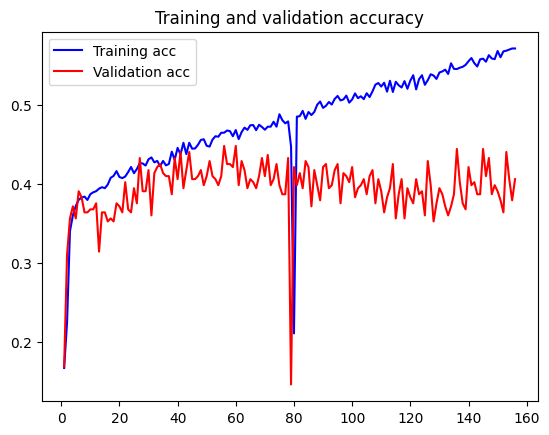

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

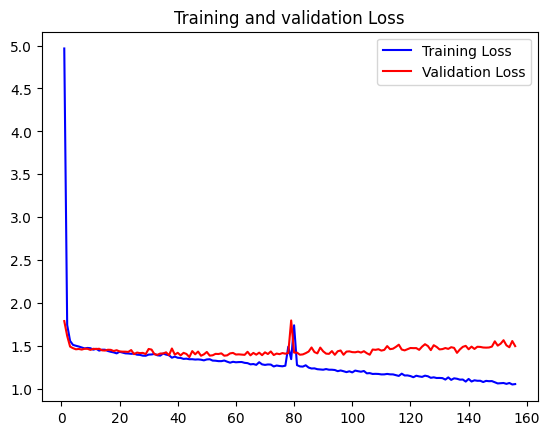

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/all_mfcc20_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       382
           1       0.38      0.22      0.27       381
           2       0.46      0.32      0.38       381
           3       0.40      0.35      0.37       382
           4       0.38      0.54      0.45       326
           5       0.48      0.65      0.55       381

    accuracy                           0.46      2233
   macro avg       0.45      0.46      0.44      2233
weighted avg       0.45      0.46      0.44      2233



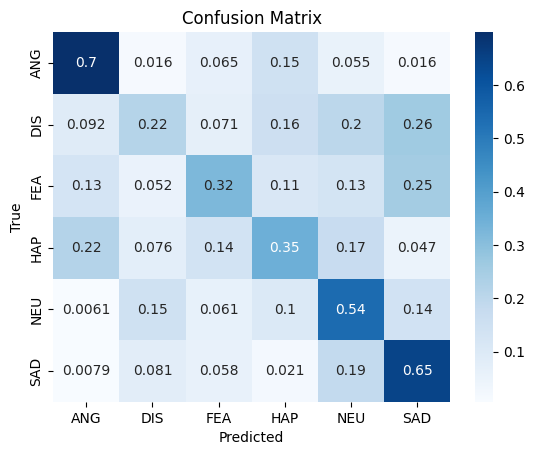

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Comment
The most of confusing classes are Disgust and Fear as they have the lowest percentage of correctly classified labels.
Sadness and Anger were the least confusing classes.
We'll attempt to use n_mfcc=100 to get better results.

### Model with n=100

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
extracted_features_labels.head()

tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  \
0   0.073405   0.040449   0.660159   0.702062   0.689090   0.684471   
1   0.066116   0.015537   0.718357   0.745182   0.662129   0.679968   
2   0.058807   0.043968   0.626592   0.678205   0.660260   0.658140   
3   0.061144   0.040781   0.655499   0.664553   0.682299   0.690717   
4   0.058782   0.019746   0.711815   0.697958   0.680827   0.682312   

   zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  ...  spectral_contrast_2  spectral_contrast_3  \
0                    0.632071  ...            -0.000133             1.080681   
1                    0.621079  ...            -0.000056             0.450756   
2                    0.672762  ...            -0.000138             1.117468   
3                    0.631261  ...            -0.000134             1.086504   
4                    0.648178  ...            -0.000061             0.494205   

   spectral_contrast_4  spectral_contrast_5  spectral_contrast_6  \
0            -0.003190             0.008633            -0.001825   
1            -0.009453            -0.030335            -0.055103   
2            -0.007598             0.053141            -0.030707   
3             0.017944             0.044451            -0.065497   
4             0.016330             0.010619            -0.010604   

   spectral_flatness_  poly_features_0  poly_features_1  \
0           -0.101469         0.005897        -0.000400   
1           -0.040881         0.013961         0.006287   
2           -0.034195         0.025276         0.009451   
3           -0.030692        -0.012118         0.009784   
4           -0.074784         0.017251        -0.006720   

   fundamental_frequency_  labels  
0              247.729313     ANG  
1              212.067106     DIS  
2              191.761115     FEA  
3              196.300324     HAP  
4              188.236069     NEU  

[5 rows x 263 columns]

In [ ]:
labels=extracted_features_labels['labels']

In [ ]:
features = extracted_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  \
0   0.073405   0.040449   0.660159   0.702062   0.689090   0.684471   
1   0.066116   0.015537   0.718357   0.745182   0.662129   0.679968   
2   0.058807   0.043968   0.626592   0.678205   0.660260   0.658140   
3   0.061144   0.040781   0.655499   0.664553   0.682299   0.690717   
4   0.058782   0.019746   0.711815   0.697958   0.680827   0.682312   

   zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  ...  spectral_contrast_1  spectral_contrast_2  \
0                    0.632071  ...             0.000219            -0.000133   
1                    0.621079  ...             0.000148            -0.000056   
2                    0.672762  ...             0.000204            -0.000138   
3                    0.631261  ...             0.000158            -0.000134   
4                    0.648178  ...             0.000160            -0.000061   

   spectral_contrast_3  spectral_contrast_4  spectral_contrast_5  \
0             1.080681            -0.003190             0.008633   
1             0.450756            -0.009453            -0.030335   
2             1.117468            -0.007598             0.053141   
3             1.086504             0.017944             0.044451   
4             0.494205             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  poly_features_0  poly_features_1  \
0            -0.001825           -0.101469         0.005897        -0.000400   
1            -0.055103           -0.040881         0.013961         0.006287   
2            -0.030707           -0.034195         0.025276         0.009451   
3            -0.065497           -0.030692        -0.012118         0.009784   
4            -0.010604           -0.074784         0.017251        -0.006720   

   fundamental_frequency_  
0              247.729313  
1              212.067106  
2              191.761115  
3              196.300324  
4              188.236069  

[5 rows x 262 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn=np.expand_dims(X_test,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  \
4126   0.037350   0.010550   0.714716   0.717191   0.681176   0.650288   
1327   0.048431   0.013177   0.656769   0.781793   0.592532   0.552070   
6447   0.132651   0.021855   0.593309   0.581424   0.531269   0.494305   
466    0.038265   0.011804   0.568514   0.548605   0.573122   0.525459   
3932   0.063864   0.045161   0.563279   0.661952   0.582445   0.533208   
...         ...        ...        ...        ...        ...        ...   
2779   0.057474   0.012976   0.676133   0.655463   0.638735   0.701616   
5319   0.063080   0.023853   0.654534   0.662778   0.608399   0.626269   
3525   0.049382   0.018788   0.655965   0.714045   0.711012   0.639617   
864    0.036152   0.009813   0.712130   0.722814   0.653113   0.657553   
4194   0.054494   0.027084   0.637558   0.685593   0.606046   0.577774   

      zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126          

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 5,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5))
  # 2 strides
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  \
1527   0.123692   0.055352   0.602927   0.614756   0.564661   0.622174   
5562   0.052077   0.015425   0.615742   0.596831   0.567270   0.615401   
2407   0.044926   0.011962   0.568480   0.588500   0.573872   0.594684   
4530   0.059480   0.014358   0.574406   0.583643   0.558583   0.551834   
4093   0.061845   0.026991   0.564718   0.659557   0.757888   0.650629   

      zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  ...  spectral_contrast_1  \
1527                    0.633283  ...             0.000256   
5562                    0.772682  ...             0.000199   
2407                    0.635171  ...             0.000210   
4530                    0.688398  ...             0.000209   
4093                    0.800875  ...             0.000150   

      spectral_contrast_2  spectral_contrast_3  spectral_contrast_4  \
1527            -0.000128             1.097631            -0.012353   
5562            -0.000043             0.338788            -0.029762   
2407            -0.000033             0.256904             0.021776   
4530            -0.000038             0.302809             0.016184   
4093            -0.000079             0.626115             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  \
1527            -0.018718            -0.034307            0.058312   
5562            -0.025168            -0.052351           -0.076871   
2407            -0.049518            -0.053909           -0.015008   
4530            -0.011953            -0.002536           -0.084894   
4093            -0.048352            -0.034110           -0.154496   

      poly_features_0  poly_features_1  fundamental_frequency_  
1527         0.005468        -0.008575              264.248385  
5562         0.025933         0.021561              131.737343  
2407         0.004359         0.021704              180.646363  
4530         0.004899        -0.000044              167.834554  
4093         0.026251         0.034903              160.810982  

[5 rows x 262 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/all_mfcc100_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 4.3585 - accuracy: 0.1718
Epoch 1: val_accuracy improved from -inf to 0.19157, saving model to /content/drive/MyDrive/Kaggle_ds/all_mfcc100_model1.best.hdf5
310/310 [==============================] - 6s 10ms/step - loss: 4.3585 - accuracy: 0.1718 - val_loss: 1.7908 - val_accuracy: 0.1916 - lr: 0.0010
Epoch 2/700
308/310 [============================>.] - ETA: 0s - loss: 1.7597 - accuracy: 0.2092
Epoch 2: val_accuracy improved from 0.19157 to 0.33333, saving model to /content/drive/MyDrive/Kaggle_ds/all_mfcc100_model1.best.hdf5
310/310 [==============================] - 2s 8ms/step - loss: 1.7587 - accuracy: 0.2102 - val_loss: 1.5869 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/700
304/310 [============================>.] - ETA: 0s - loss: 1.5579 - accuracy: 0.3357
Epoch 3: val_accuracy improved from 0.33333 to 0.35632, saving model to /content/drive/MyDrive/Kaggle_ds/all_mfcc100_model1.best.hdf5
310/310 [============

<Figure size 640x480 with 0 Axes>

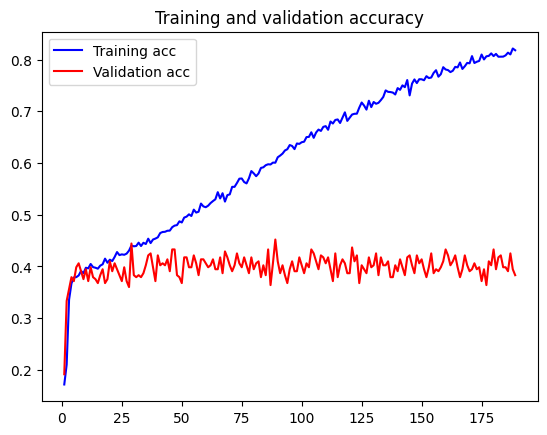

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

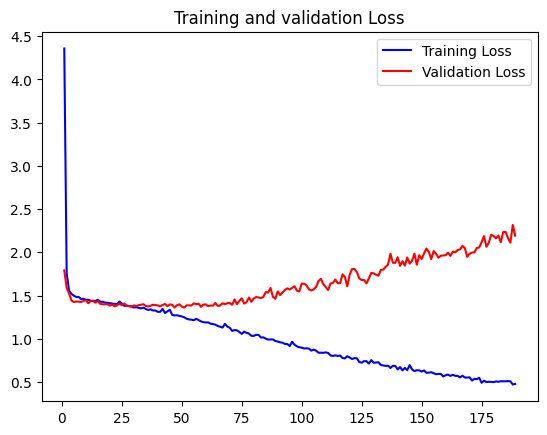

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/all_mfcc100_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       382
           1       0.34      0.25      0.29       381
           2       0.45      0.27      0.34       381
           3       0.40      0.40      0.40       382
           4       0.35      0.49      0.41       326
           5       0.45      0.60      0.52       381

    accuracy                           0.44      2233
   macro avg       0.44      0.44      0.44      2233
weighted avg       0.45      0.44      0.44      2233



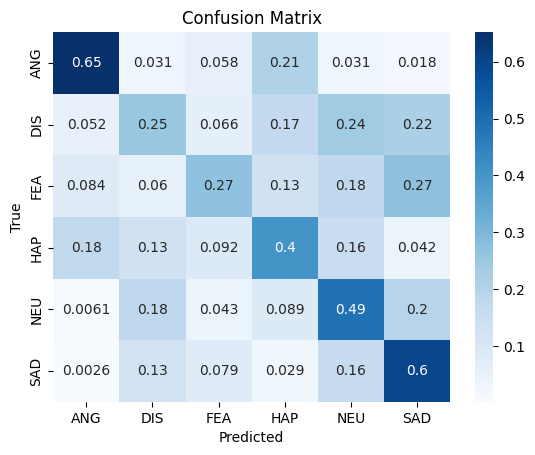

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Comment
The most of confusing classes are Disgust and Fear as they have the lowest percentage of correctly classified labels

### Comments
The use of all of the extractable data caused the model some improvement over simply using ZRC and Energy but to get better results we'll need to find the best features for speech emotion recognition.

## Incremental Feature Selection

### Model 1

#### Using ZRC, Energy and MFCC (n=20)

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_mfcc20.csv')
extracted_features_labels.shape

(7442, 183)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=20)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=183)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=20)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'mfcc_0', 'mfcc_1', 'mfcc_2',
       'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9',
       'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15',
       'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19', 'labels'],
      dtype='object')

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_     mfcc_0    mfcc_1    mfcc_2     mfcc_3  \
0             0.674981  0.579658 -15.391998 -7.945820 -5.337207  -7.956209   
1             0.690180  0.618542 -19.336275  1.032564 -4.046562  -9.434969   
2             0.623614  0.599817 -14.484967 -3.553893 -3.162869  -7.994785   
3             0.676714  0.662607 -18.296469 -4.518619 -4.815924 -11.666108   
4             0.653490  0.601200  -9.710364 -7.123269 -5.085679 -10.168397   

      mfcc_4     mfcc_5    mfcc_6     mfcc_7  ...   mfcc_11   mfcc_12  \
0  -6.508597  -5.808754 -1.041687 -14.153826  ...  0.287186 -6.150031   
1  -2.145402 -10.414154  2.581147 -14.247907  ...  0.602208 -7.687426   
2  -8.584072  -7.743512 -2.013843 -11.905601  ... -2.776498 -6.703301   
3 -10.200100  -6.431186 -0.720919 -15.828364  ... -0.954951 -6.378819   
4  -5.524042  -4.099905 -2.416726  -9.990394  ... -0.987445 -6.760090   

    mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19  \
0 -5.127417  0.002945  0.005976  0.037027  0.264995  1.402983  2.726535   
1 -4.293844  0.001829  0.006370  0.063852  0.336360  0.214140  0.120846   
2 -5.635390  0.002547  0.005936  0.026407  0.051256  0.198164  0.688195   
3 -5.316256  0.003307  0.005886  0.023850  0.056603  0.598534  2.244174   
4 -2.463531  0.002267  0.009326  0.052079  0.285127  0.307519  0.247580   

   labels  
0     ANG  
1     DIS  
2     FEA  
3     HAP  
4     NEU  

[5 rows x 23 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_     mfcc_0    mfcc_1    mfcc_2     mfcc_3  \
0             0.674981  0.579658 -15.391998 -7.945820 -5.337207  -7.956209   
1             0.690180  0.618542 -19.336275  1.032564 -4.046562  -9.434969   
2             0.623614  0.599817 -14.484967 -3.553893 -3.162869  -7.994785   
3             0.676714  0.662607 -18.296469 -4.518619 -4.815924 -11.666108   
4             0.653490  0.601200  -9.710364 -7.123269 -5.085679 -10.168397   

      mfcc_4     mfcc_5    mfcc_6     mfcc_7  ...    mfcc_10   mfcc_11  \
0  -6.508597  -5.808754 -1.041687 -14.153826  ... -10.769011  0.287186   
1  -2.145402 -10.414154  2.581147 -14.247907  ...  -7.734887  0.602208   
2  -8.584072  -7.743512 -2.013843 -11.905601  ...  -8.250978 -2.776498   
3 -10.200100  -6.431186 -0.720919 -15.828364  ...  -9.877846 -0.954951   
4  -5.524042  -4.099905 -2.416726  -9.990394  ...  -9.227773 -0.987445   

    mfcc_12   mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18  \
0 -6.150031 -5.127417  0.002945  0.005976  0.037027  0.264995  1.402983   
1 -7.687426 -4.293844  0.001829  0.006370  0.063852  0.336360  0.214140   
2 -6.703301 -5.635390  0.002547  0.005936  0.026407  0.051256  0.198164   
3 -6.378819 -5.316256  0.003307  0.005886  0.023850  0.056603  0.598534   
4 -6.760090 -2.463531  0.002267  0.009326  0.052079  0.285127  0.307519   

    mfcc_19  
0  2.726535  
1  0.120846  
2  0.688195  
3  2.244174  
4  0.247580  

[5 rows x 22 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn=np.expand_dims(X_test,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_     mfcc_0    mfcc_1    mfcc_2    mfcc_3  \
4126             0.634930  0.675222  -8.600396  5.870154 -3.219012 -6.320945   
1327             0.587179  0.562927 -13.877206  4.843155 -0.994450 -3.688108   
6447             0.522630  0.575573 -15.638021  7.850093 -0.880286 -0.596513   
466              0.507379  0.501216  -3.351349  1.063131 -1.620267 -5.087644   
3932             0.573301  0.623131  -5.336411 -3.868886 -5.542290  0.274103   
...                   ...       ...        ...       ...       ...       ...   
2779             0.781117  0.674407 -12.903172  8.845173 -5.026839 -2.155869   
5319             0.693643  0.695150  -9.890828  5.128179 -9.619823 -5.608170   
3525             0.624157  0.629866  -3.821870  1.352687 -7.359309 -5.830619   
864              0.667845  0.621164 -10.371660  7.680342 -1.775359 -3.660372   
4194             0.569484  0.611611 -12.615895 -0.282557 -3.448395 -5.353369   

        m

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 5,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5))
  # 2 strides
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_     mfcc_0    mfcc_1     mfcc_2    mfcc_3  \
1527             0.689266  0.652655 -14.476381 -1.713578 -13.384045 -8.735784   
5562             0.631718  0.732830 -10.511858 -1.144310  -5.283758 -4.280743   
2407             0.641833  0.657047 -10.535636 -2.935298  -5.527678 -3.730730   
4530             0.598864  0.678242 -17.449455  1.536956  -4.455431 -5.915397   
4093             0.635906  0.667660  -4.850620  3.544814  -6.842366 -4.882605   

        mfcc_4     mfcc_5     mfcc_6     mfcc_7  ...   mfcc_10   mfcc_11  \
1527  1.693204  -9.457906   6.223527  -9.701426  ... -3.258705  0.054185   
5562  2.125836 -11.908953   3.829282 -11.685564  ... -3.952413  0.260212   
2407  5.459807  -8.798803   5.875926  -8.537578  ... -3.174131 -1.582310   
4530  1.861106 -11.077613  10.358575 -10.380719  ... -1.783346  0.278721   
4093  8.659999  -6.420776   7.834142 -11.721331  ... -5.617970 -3.556615   

       mfcc_12   mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18  \
1527 -2.378454 -2.708469  0.103883  0.041601  0.064155  0.080811  0.333192   
5562 -1.406468  2.921649  0.062145  0.021755  0.054790  0.211069  0.206934   
2407 -6.951099  0.632264  0.044487  0.019783  0.033866  0.068116  0.065231   
4530 -4.683255  3.070182  0.071547  0.026806  0.036819  0.060946  0.122236   
4093 -4.789386 -0.747635  0.080434  0.037663  0.098121  0.212194  0.202632   

       mfcc_19  
1527  1.633486  
5562  0.146191  
2407  0.137868  
4530  0.458469  
4093  0.861067  

[5 rows x 22 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_mfcc20_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
309/310 [============================>.] - ETA: 0s - loss: 1.7265 - accuracy: 0.2381
Epoch 1: val_accuracy improved from -inf to 0.26054, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_mfcc20_model1.best.hdf5
310/310 [==============================] - 17s 48ms/step - loss: 1.7264 - accuracy: 0.2381 - val_loss: 1.6256 - val_accuracy: 0.2605 - lr: 0.0010
Epoch 2/700
309/310 [============================>.] - ETA: 0s - loss: 1.6512 - accuracy: 0.2878
Epoch 2: val_accuracy improved from 0.26054 to 0.28736, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_mfcc20_model1.best.hdf5
310/310 [==============================] - 12s 40ms/step - loss: 1.6511 - accuracy: 0.2880 - val_loss: 1.6198 - val_accuracy: 0.2874 - lr: 0.0010
Epoch 3/700
309/310 [============================>.] - ETA: 0s - loss: 1.6128 - accuracy: 0.3056
Epoch 3: val_accuracy improved from 0.28736 to 0.34100, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_mfcc20_model1.best.hdf5


<Figure size 640x480 with 0 Axes>

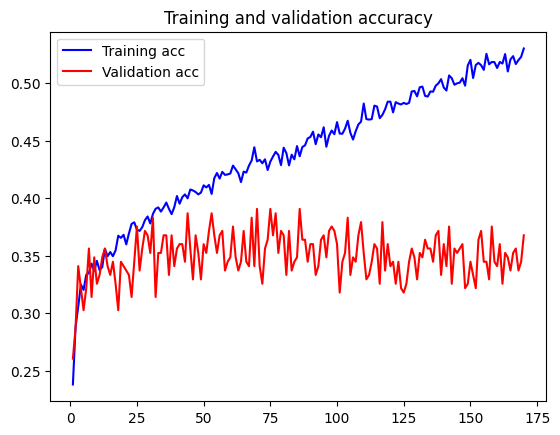

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

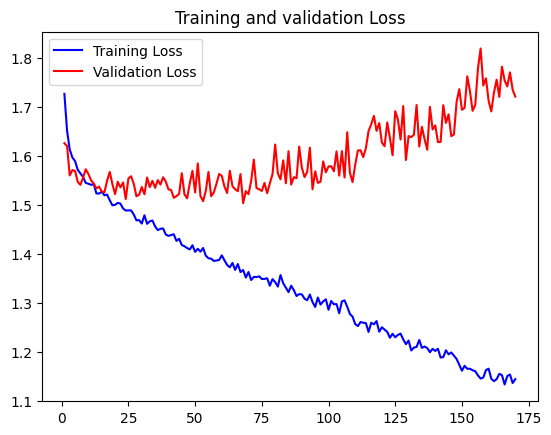

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_mfcc20_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       382
           1       0.33      0.29      0.31       381
           2       0.40      0.15      0.22       381
           3       0.29      0.30      0.30       382
           4       0.27      0.50      0.35       326
           5       0.43      0.42      0.42       381

    accuracy                           0.36      2233
   macro avg       0.37      0.36      0.35      2233
weighted avg       0.38      0.36      0.35      2233



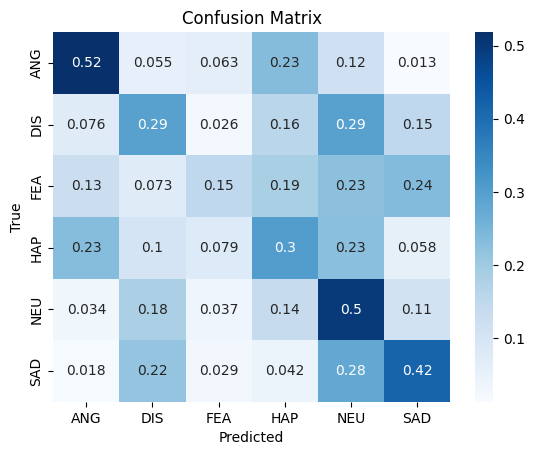

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Disgust and Fear as they have the lowest percentage of correctly classified labels, 0.29 and 0.15 respectively.

The features selected performed even worse than all the features combined we'll continue adding features in hopes of getting better accuracy and f1-scores.

#### Adding Melspectrogram (mean)

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_mfcc20.csv')
extracted_features_labels.shape

(7442, 183)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=20)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=183)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=20,melspectrogram=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'mfcc_0', 'mfcc_1', 'mfcc_2',
       'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       ...
       'melspectrogram_119', 'melspectrogram_120', 'melspectrogram_121',
       'melspectrogram_122', 'melspectrogram_123', 'melspectrogram_124',
       'melspectrogram_125', 'melspectrogram_126', 'melspectrogram_127',
       'labels'],
      dtype='object', length=151)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_     mfcc_0    mfcc_1    mfcc_2     mfcc_3  \
0             0.674981  0.579658 -15.391998 -7.945820 -5.337207  -7.956209   
1             0.690180  0.618542 -19.336275  1.032564 -4.046562  -9.434969   
2             0.623614  0.599817 -14.484967 -3.553893 -3.162869  -7.994785   
3             0.676714  0.662607 -18.296469 -4.518619 -4.815924 -11.666108   
4             0.653490  0.601200  -9.710364 -7.123269 -5.085679 -10.168397   

      mfcc_4     mfcc_5    mfcc_6     mfcc_7  ...  melspectrogram_119  \
0  -6.508597  -5.808754 -1.041687 -14.153826  ...        3.702384e-12   
1  -2.145402 -10.414154  2.581147 -14.247907  ...        7.419814e-11   
2  -8.584072  -7.743512 -2.013843 -11.905601  ...        8.763475e-09   
3 -10.200100  -6.431186 -0.720919 -15.828364  ...        3.403508e-09   
4  -5.524042  -4.099905 -2.416726  -9.990394  ...        1.130958e-09   

   melspectrogram_120  melspectrogram_121  melspectrogram_122  \
0        1.728117e-12        9.800693e-13         1397.463984   
1        7.311606e-11        7.245975e-11         1340.653965   
2        8.633153e-09        8.547902e-09         1301.926803   
3        3.348467e-09        3.313621e-09         1365.664118   
4        1.110888e-09        1.098608e-09         1312.662031   

   melspectrogram_123  melspectrogram_124  melspectrogram_125  \
0         1529.453717         2769.952947           20.522305   
1         1523.284488         2627.690381           18.949320   
2         1532.288485         2592.116595           20.376582   
3         1536.978201         2772.333442           19.721078   
4         1506.764557         2671.463013           18.361862   

   melspectrogram_126  melspectrogram_127  labels  
0           13.523137           17.490685     ANG  
1           13.277944           15.845860     DIS  
2           15.147682           16.980182     FEA  
3           14.442531           17.062276     HAP  
4           13.297212           16.916604     NEU  

[5 rows x 151 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_     mfcc_0    mfcc_1    mfcc_2     mfcc_3  \
0             0.674981  0.579658 -15.391998 -7.945820 -5.337207  -7.956209   
1             0.690180  0.618542 -19.336275  1.032564 -4.046562  -9.434969   
2             0.623614  0.599817 -14.484967 -3.553893 -3.162869  -7.994785   
3             0.676714  0.662607 -18.296469 -4.518619 -4.815924 -11.666108   
4             0.653490  0.601200  -9.710364 -7.123269 -5.085679 -10.168397   

      mfcc_4     mfcc_5    mfcc_6     mfcc_7  ...  melspectrogram_118  \
0  -6.508597  -5.808754 -1.041687 -14.153826  ...        4.487620e-12   
1  -2.145402 -10.414154  2.581147 -14.247907  ...        7.516852e-11   
2  -8.584072  -7.743512 -2.013843 -11.905601  ...        8.953288e-09   
3 -10.200100  -6.431186 -0.720919 -15.828364  ...        3.479894e-09   
4  -5.524042  -4.099905 -2.416726  -9.990394  ...        1.158418e-09   

   melspectrogram_119  melspectrogram_120  melspectrogram_121  \
0        3.702384e-12        1.728117e-12        9.800693e-13   
1        7.419814e-11        7.311606e-11        7.245975e-11   
2        8.763475e-09        8.633153e-09        8.547902e-09   
3        3.403508e-09        3.348467e-09        3.313621e-09   
4        1.130958e-09        1.110888e-09        1.098608e-09   

   melspectrogram_122  melspectrogram_123  melspectrogram_124  \
0         1397.463984         1529.453717         2769.952947   
1         1340.653965         1523.284488         2627.690381   
2         1301.926803         1532.288485         2592.116595   
3         1365.664118         1536.978201         2772.333442   
4         1312.662031         1506.764557         2671.463013   

   melspectrogram_125  melspectrogram_126  melspectrogram_127  
0           20.522305           13.523137           17.490685  
1           18.949320           13.277944           15.845860  
2           20.376582           15.147682           16.980182  
3           19.721078           14.442531           17.062276  
4           18.361862           13.297212           16.916604  

[5 rows x 150 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn=np.expand_dims(X_test,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_     mfcc_0    mfcc_1    mfcc_2    mfcc_3  \
4126             0.634930  0.675222  -8.600396  5.870154 -3.219012 -6.320945   
1327             0.587179  0.562927 -13.877206  4.843155 -0.994450 -3.688108   
6447             0.522630  0.575573 -15.638021  7.850093 -0.880286 -0.596513   
466              0.507379  0.501216  -3.351349  1.063131 -1.620267 -5.087644   
3932             0.573301  0.623131  -5.336411 -3.868886 -5.542290  0.274103   
...                   ...       ...        ...       ...       ...       ...   
2779             0.781117  0.674407 -12.903172  8.845173 -5.026839 -2.155869   
5319             0.693643  0.695150  -9.890828  5.128179 -9.619823 -5.608170   
3525             0.624157  0.629866  -3.821870  1.352687 -7.359309 -5.830619   
864              0.667845  0.621164 -10.371660  7.680342 -1.775359 -3.660372   
4194             0.569484  0.611611 -12.615895 -0.282557 -3.448395 -5.353369   

        m

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 5,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5))
  # 2 strides
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_     mfcc_0    mfcc_1     mfcc_2    mfcc_3  \
1527             0.689266  0.652655 -14.476381 -1.713578 -13.384045 -8.735784   
5562             0.631718  0.732830 -10.511858 -1.144310  -5.283758 -4.280743   
2407             0.641833  0.657047 -10.535636 -2.935298  -5.527678 -3.730730   
4530             0.598864  0.678242 -17.449455  1.536956  -4.455431 -5.915397   
4093             0.635906  0.667660  -4.850620  3.544814  -6.842366 -4.882605   

        mfcc_4     mfcc_5     mfcc_6     mfcc_7  ...  melspectrogram_118  \
1527  1.693204  -9.457906   6.223527  -9.701426  ...        3.450257e-09   
5562  2.125836 -11.908953   3.829282 -11.685564  ...        1.011360e-09   
2407  5.459807  -8.798803   5.875926  -8.537578  ...        7.799613e-09   
4530  1.861106 -11.077613  10.358575 -10.380719  ...        1.028639e-09   
4093  8.659999  -6.420776   7.834142 -11.721331  ...        1.034034e-10   

      melspectrogram_119  melspectrogram_120  melspectrogram_121  \
1527        3.379370e-09        3.329460e-09        3.297280e-09   
5562        9.877809e-10        9.710238e-10        9.604153e-10   
2407        7.626812e-09        7.507829e-09        7.431787e-09   
4530        1.003866e-09        9.865995e-10        9.756035e-10   
4093        1.006873e-10        9.905057e-11        9.775715e-11   

      melspectrogram_122  melspectrogram_123  melspectrogram_124  \
1527         1965.264964         1841.063377         3875.720215   
5562         1236.699612         1585.707600         2699.426270   
2407         1135.029224         1606.587687         2564.015550   
4530         1265.944983         1632.154394         2685.447892   
4093         1309.331927         1563.274021         2666.681038   

      melspectrogram_125  melspectrogram_126  melspectrogram_127  
1527           14.450345           14.907653           18.927719  
5562           13.687104           14.108145           16.922307  
2407           12.958318           13.728775           17.072836  
4530           13.705563           14.017180           16.946937  
4093           15.315278           14.334064           16.291431  

[5 rows x 150 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_mfcc20_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
309/310 [============================>.] - ETA: 0s - loss: 3.6505 - accuracy: 0.2640
Epoch 1: val_accuracy improved from -inf to 0.34100, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_mfcc20_model1.best.hdf5
310/310 [==============================] - 31s 94ms/step - loss: 3.6488 - accuracy: 0.2639 - val_loss: 1.6145 - val_accuracy: 0.3410 - lr: 0.0010
Epoch 2/700
309/310 [============================>.] - ETA: 0s - loss: 1.5772 - accuracy: 0.3350
Epoch 2: val_accuracy improved from 0.34100 to 0.37165, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_mfcc20_model1.best.hdf5
310/310 [==============================] - 23s 75ms/step - loss: 1.5774 - accuracy: 0.3349 - val_loss: 1.5071 - val_accuracy: 0.3716 - lr: 0.0010
Epoch 3/700
309/310 [============================>.] - ETA: 0s - loss: 1.5202 - accuracy: 0.3655
Epoch 3: val_accuracy improved from 0.37165 to 0.37548, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_e

<Figure size 640x480 with 0 Axes>

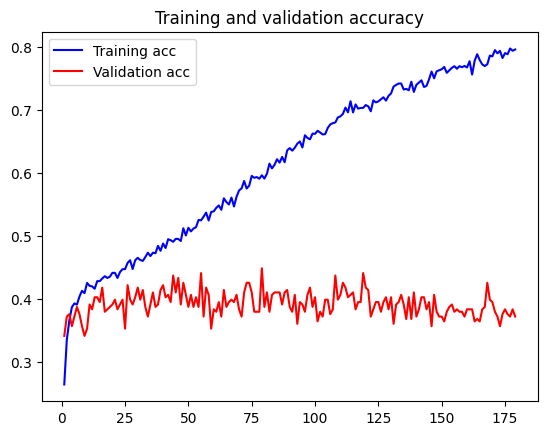

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

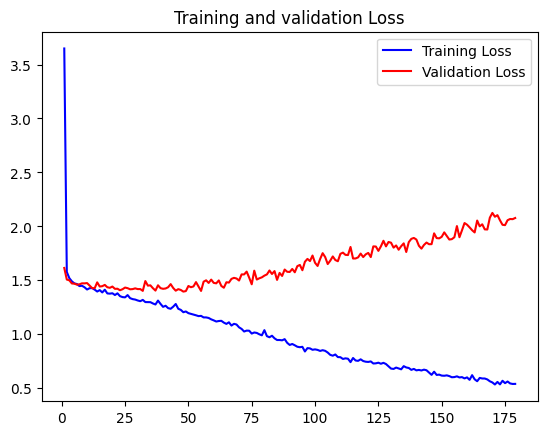

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_mfcc20_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       382
           1       0.39      0.28      0.33       381
           2       0.36      0.38      0.37       381
           3       0.39      0.40      0.39       382
           4       0.44      0.46      0.45       326
           5       0.53      0.62      0.57       381

    accuracy                           0.46      2233
   macro avg       0.45      0.46      0.45      2233
weighted avg       0.45      0.46      0.45      2233



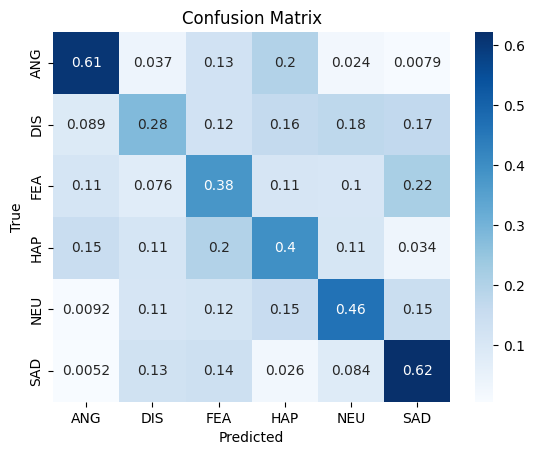

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Disgust and Fear as they have the lowest percentage of correctly classified labels, 0.28 and 0.38 respectively.
The addition of melspectrogram improved fear's classification by more than double.

#### Adding Chroma

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_mfcc20.csv')
extracted_features_labels.shape

(7442, 183)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=20)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=183)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=20,melspectrogram=True,spectral_rolloff=True,chroma=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'melspectrogram_120', 'melspectrogram_121', 'melspectrogram_122',
       'melspectrogram_123', 'melspectrogram_124', 'melspectrogram_125',
       'melspectrogram_126', 'melspectrogram_127', 'spectral_rolloff_',
       'labels'],
      dtype='object', length=164)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  melspectrogram_120  melspectrogram_121  \
0                  126.714439  ...        1.728117e-12        9.800693e-13   
1                  141.738846  ...        7.311606e-11        7.245975e-11   
2                  120.016312  ...        8.633153e-09        8.547902e-09   
3                  125.692116  ...        3.348467e-09        3.313621e-09   
4                  129.784485  ...        1.110888e-09        1.098608e-09   

   melspectrogram_122  melspectrogram_123  melspectrogram_124  \
0         1397.463984         1529.453717         2769.952947   
1         1340.653965         1523.284488         2627.690381   
2         1301.926803         1532.288485         2592.116595   
3         1365.664118         1536.978201         2772.333442   
4         1312.662031         1506.764557         2671.463013   

   melspectrogram_125  melspectrogram_126  melspectrogram_127  \
0           20.522305           13.523137           17.490685   
1           18.949320           13.277944           15.845860   
2           20.376582           15.147682           16.980182   
3           19.721078           14.442531           17.062276   
4           18.361862           13.297212           16.916604   

   spectral_rolloff_  labels  
0          18.207274     ANG  
1          17.067751     DIS  
2          17.150892     FEA  
3          17.696191     HAP  
4          18.381072     NEU  

[5 rows x 164 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  melspectrogram_119  melspectrogram_120  \
0                  126.714439  ...        3.702384e-12        1.728117e-12   
1                  141.738846  ...        7.419814e-11        7.311606e-11   
2                  120.016312  ...        8.763475e-09        8.633153e-09   
3                  125.692116  ...        3.403508e-09        3.348467e-09   
4                  129.784485  ...        1.130958e-09        1.110888e-09   

   melspectrogram_121  melspectrogram_122  melspectrogram_123  \
0        9.800693e-13         1397.463984         1529.453717   
1        7.245975e-11         1340.653965         1523.284488   
2        8.547902e-09         1301.926803         1532.288485   
3        3.313621e-09         1365.664118         1536.978201   
4        1.098608e-09         1312.662031         1506.764557   

   melspectrogram_124  melspectrogram_125  melspectrogram_126  \
0         2769.952947           20.522305           13.523137   
1         2627.690381           18.949320           13.277944   
2         2592.116595           20.376582           15.147682   
3         2772.333442           19.721078           14.442531   
4         2671.463013           18.361862           13.297212   

   melspectrogram_127  spectral_rolloff_  
0           17.490685          18.207274  
1           15.845860          17.067751  
2           16.980182          17.150892  
3           17.062276          17.696191  
4           16.916604          18.381072  

[5 rows x 163 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn=np.expand_dims(X_test,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 5,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5))
  # 2 strides
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  melspectrogram_119  melspectrogram_120  \
1527                   93.955490  ...        3.379370e-09        3.329460e-09   
5562                  138.557022  ...        9.877809e-10        9.710238e-10   
2407                  141.119080  ...        7.626812e-09        7.507829e-09   
4530                  144.548294  ...        1.003866e-09        9.865995e-10   
4093                  146.267792  ...        1.006873e-10        9.905057e-11   

      melspectrogram_121  melspectrogram_122  melspectrogram_123  \
1527        3.297280e-09         1965.264964         1841.063377   
5562        9.604153e-10         1236.699612         1585.707600   
2407        7.431787e-09         1135.029224         1606.587687   
4530        9.756035e-10         1265.944983         1632.154394   
4093        9.775715e-11         1309.331927         1563.274021   

      melspectrogram_124  melspectrogram_125  melspectrogram_126  \
1527         3875.720215           14.450345           14.907653   
5562         2699.426270           13.687104           14.108145   
2407         2564.015550           12.958318           13.728775   
4530         2685.447892           13.705563           14.017180   
4093         2666.681038           15.315278           14.334064   

      melspectrogram_127  spectral_rolloff_  
1527           18.927719          17.326566  
5562           16.922307          16.527073  
2407           17.072836          16.064645  
4530           16.946937          15.779695  
4093           16.291431          16.942262  

[5 rows x 163 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
309/310 [============================>.] - ETA: 0s - loss: 3.3607 - accuracy: 0.1962
Epoch 1: val_accuracy improved from -inf to 0.27969, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_model1.best.hdf5
310/310 [==============================] - 27s 80ms/step - loss: 3.3593 - accuracy: 0.1964 - val_loss: 1.7224 - val_accuracy: 0.2797 - lr: 0.0010
Epoch 2/700
309/310 [============================>.] - ETA: 0s - loss: 1.6415 - accuracy: 0.3012
Epoch 2: val_accuracy improved from 0.27969 to 0.37931, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_model1.best.hdf5
310/310 [==============================] - 27s 87ms/step - loss: 1.6432 - accuracy: 0.3011 - val_loss: 1.5443 - val_accuracy: 0.3793 - lr: 0.0010
Epoch 3/700
310/310 [==============================] - ETA: 0s - loss: 1.5330 - accuracy: 0.3525
Epoch 3: val_accuracy did not improve from 0.37931
310/310 [====================

<Figure size 640x480 with 0 Axes>

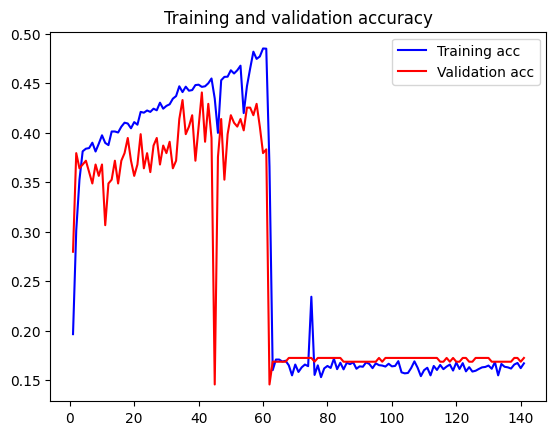

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

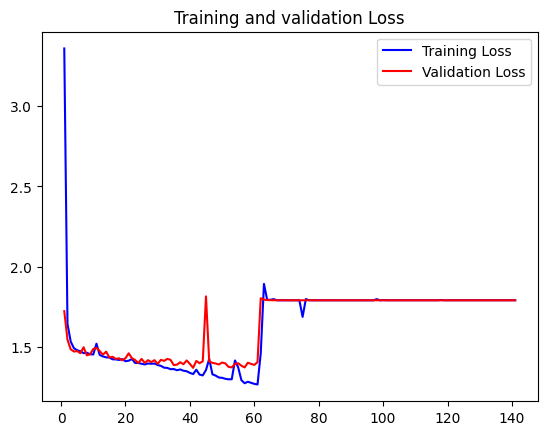

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 2s 16ms/step
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       382
           1       0.49      0.11      0.18       381
           2       0.45      0.25      0.32       381
           3       0.37      0.45      0.41       382
           4       0.34      0.51      0.41       326
           5       0.44      0.70      0.54       381

    accuracy                           0.44      2233
   macro avg       0.45      0.44      0.41      2233
weighted avg       0.45      0.44      0.41      2233



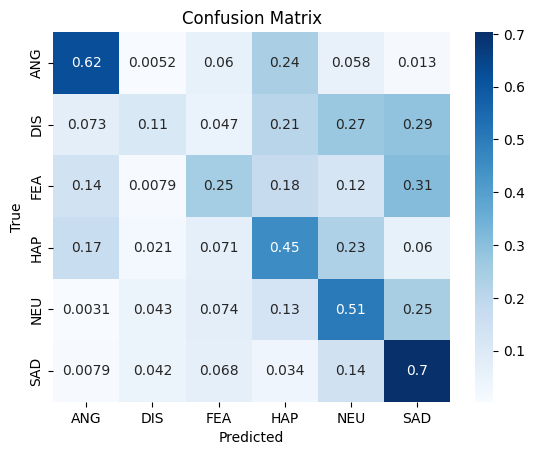

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Disgust and Fear as they have the lowest percentage of correctly classified labels, 0.11 and 0.25 respectively.

The use of chroma degraded the disgust classification accuracy but overall improved the model.

#### Adding Spectral Rolloff

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_mfcc20.csv')
extracted_features_labels.shape

(7442, 183)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=20)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=183)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=20,melspectrogram=True,spectral_rolloff=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'mfcc_0', 'mfcc_1', 'mfcc_2',
       'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       ...
       'melspectrogram_120', 'melspectrogram_121', 'melspectrogram_122',
       'melspectrogram_123', 'melspectrogram_124', 'melspectrogram_125',
       'melspectrogram_126', 'melspectrogram_127', 'spectral_rolloff_',
       'labels'],
      dtype='object', length=152)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_     mfcc_0    mfcc_1    mfcc_2     mfcc_3  \
0             0.674981  0.579658 -15.391998 -7.945820 -5.337207  -7.956209   
1             0.690180  0.618542 -19.336275  1.032564 -4.046562  -9.434969   
2             0.623614  0.599817 -14.484967 -3.553893 -3.162869  -7.994785   
3             0.676714  0.662607 -18.296469 -4.518619 -4.815924 -11.666108   
4             0.653490  0.601200  -9.710364 -7.123269 -5.085679 -10.168397   

      mfcc_4     mfcc_5    mfcc_6     mfcc_7  ...  melspectrogram_120  \
0  -6.508597  -5.808754 -1.041687 -14.153826  ...        1.728117e-12   
1  -2.145402 -10.414154  2.581147 -14.247907  ...        7.311606e-11   
2  -8.584072  -7.743512 -2.013843 -11.905601  ...        8.633153e-09   
3 -10.200100  -6.431186 -0.720919 -15.828364  ...        3.348467e-09   
4  -5.524042  -4.099905 -2.416726  -9.990394  ...        1.110888e-09   

   melspectrogram_121  melspectrogram_122  melspectrogram_123  \
0        9.800693e-13         1397.463984         1529.453717   
1        7.245975e-11         1340.653965         1523.284488   
2        8.547902e-09         1301.926803         1532.288485   
3        3.313621e-09         1365.664118         1536.978201   
4        1.098608e-09         1312.662031         1506.764557   

   melspectrogram_124  melspectrogram_125  melspectrogram_126  \
0         2769.952947           20.522305           13.523137   
1         2627.690381           18.949320           13.277944   
2         2592.116595           20.376582           15.147682   
3         2772.333442           19.721078           14.442531   
4         2671.463013           18.361862           13.297212   

   melspectrogram_127  spectral_rolloff_  labels  
0           17.490685          18.207274     ANG  
1           15.845860          17.067751     DIS  
2           16.980182          17.150892     FEA  
3           17.062276          17.696191     HAP  
4           16.916604          18.381072     NEU  

[5 rows x 152 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_     mfcc_0    mfcc_1    mfcc_2     mfcc_3  \
0             0.674981  0.579658 -15.391998 -7.945820 -5.337207  -7.956209   
1             0.690180  0.618542 -19.336275  1.032564 -4.046562  -9.434969   
2             0.623614  0.599817 -14.484967 -3.553893 -3.162869  -7.994785   
3             0.676714  0.662607 -18.296469 -4.518619 -4.815924 -11.666108   
4             0.653490  0.601200  -9.710364 -7.123269 -5.085679 -10.168397   

      mfcc_4     mfcc_5    mfcc_6     mfcc_7  ...  melspectrogram_119  \
0  -6.508597  -5.808754 -1.041687 -14.153826  ...        3.702384e-12   
1  -2.145402 -10.414154  2.581147 -14.247907  ...        7.419814e-11   
2  -8.584072  -7.743512 -2.013843 -11.905601  ...        8.763475e-09   
3 -10.200100  -6.431186 -0.720919 -15.828364  ...        3.403508e-09   
4  -5.524042  -4.099905 -2.416726  -9.990394  ...        1.130958e-09   

   melspectrogram_120  melspectrogram_121  melspectrogram_122  \
0        1.728117e-12        9.800693e-13         1397.463984   
1        7.311606e-11        7.245975e-11         1340.653965   
2        8.633153e-09        8.547902e-09         1301.926803   
3        3.348467e-09        3.313621e-09         1365.664118   
4        1.110888e-09        1.098608e-09         1312.662031   

   melspectrogram_123  melspectrogram_124  melspectrogram_125  \
0         1529.453717         2769.952947           20.522305   
1         1523.284488         2627.690381           18.949320   
2         1532.288485         2592.116595           20.376582   
3         1536.978201         2772.333442           19.721078   
4         1506.764557         2671.463013           18.361862   

   melspectrogram_126  melspectrogram_127  spectral_rolloff_  
0           13.523137           17.490685          18.207274  
1           13.277944           15.845860          17.067751  
2           15.147682           16.980182          17.150892  
3           14.442531           17.062276          17.696191  
4           13.297212           16.916604          18.381072  

[5 rows x 151 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn=np.expand_dims(X_test,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_     mfcc_0    mfcc_1    mfcc_2    mfcc_3  \
4126             0.634930  0.675222  -8.600396  5.870154 -3.219012 -6.320945   
1327             0.587179  0.562927 -13.877206  4.843155 -0.994450 -3.688108   
6447             0.522630  0.575573 -15.638021  7.850093 -0.880286 -0.596513   
466              0.507379  0.501216  -3.351349  1.063131 -1.620267 -5.087644   
3932             0.573301  0.623131  -5.336411 -3.868886 -5.542290  0.274103   
...                   ...       ...        ...       ...       ...       ...   
2779             0.781117  0.674407 -12.903172  8.845173 -5.026839 -2.155869   
5319             0.693643  0.695150  -9.890828  5.128179 -9.619823 -5.608170   
3525             0.624157  0.629866  -3.821870  1.352687 -7.359309 -5.830619   
864              0.667845  0.621164 -10.371660  7.680342 -1.775359 -3.660372   
4194             0.569484  0.611611 -12.615895 -0.282557 -3.448395 -5.353369   

        m

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 5,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5))
  # 2 strides
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_     mfcc_0    mfcc_1     mfcc_2    mfcc_3  \
1527             0.689266  0.652655 -14.476381 -1.713578 -13.384045 -8.735784   
5562             0.631718  0.732830 -10.511858 -1.144310  -5.283758 -4.280743   
2407             0.641833  0.657047 -10.535636 -2.935298  -5.527678 -3.730730   
4530             0.598864  0.678242 -17.449455  1.536956  -4.455431 -5.915397   
4093             0.635906  0.667660  -4.850620  3.544814  -6.842366 -4.882605   

        mfcc_4     mfcc_5     mfcc_6     mfcc_7  ...  melspectrogram_119  \
1527  1.693204  -9.457906   6.223527  -9.701426  ...        3.379370e-09   
5562  2.125836 -11.908953   3.829282 -11.685564  ...        9.877809e-10   
2407  5.459807  -8.798803   5.875926  -8.537578  ...        7.626812e-09   
4530  1.861106 -11.077613  10.358575 -10.380719  ...        1.003866e-09   
4093  8.659999  -6.420776   7.834142 -11.721331  ...        1.006873e-10   

      melspectrogram_120  melspectrogram_121  melspectrogram_122  \
1527        3.329460e-09        3.297280e-09         1965.264964   
5562        9.710238e-10        9.604153e-10         1236.699612   
2407        7.507829e-09        7.431787e-09         1135.029224   
4530        9.865995e-10        9.756035e-10         1265.944983   
4093        9.905057e-11        9.775715e-11         1309.331927   

      melspectrogram_123  melspectrogram_124  melspectrogram_125  \
1527         1841.063377         3875.720215           14.450345   
5562         1585.707600         2699.426270           13.687104   
2407         1606.587687         2564.015550           12.958318   
4530         1632.154394         2685.447892           13.705563   
4093         1563.274021         2666.681038           15.315278   

      melspectrogram_126  melspectrogram_127  spectral_rolloff_  
1527           14.907653           18.927719          17.326566  
5562           14.108145           16.922307          16.527073  
2407           13.728775           17.072836          16.064645  
4530           14.017180           16.946937          15.779695  
4093           14.334064           16.291431          16.942262  

[5 rows x 151 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_mfcc20_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
309/310 [============================>.] - ETA: 0s - loss: 3.9549 - accuracy: 0.2520
Epoch 1: val_accuracy improved from -inf to 0.31418, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_mfcc20_model1.best.hdf5
310/310 [==============================] - 26s 78ms/step - loss: 3.9531 - accuracy: 0.2520 - val_loss: 1.6485 - val_accuracy: 0.3142 - lr: 0.0010
Epoch 2/700
309/310 [============================>.] - ETA: 0s - loss: 1.5834 - accuracy: 0.3216
Epoch 2: val_accuracy improved from 0.31418 to 0.32950, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_mfcc20_model1.best.hdf5
310/310 [==============================] - 24s 77ms/step - loss: 1.5831 - accuracy: 0.3217 - val_loss: 1.5543 - val_accuracy: 0.3295 - lr: 0.0010
Epoch 3/700
309/310 [============================>.] - ETA: 0s - loss: 1.5352 - accuracy: 0.3540
Epoch 3: val_accuracy improved from 0.32950 to 0.36782, saving model to /content/drive/MyDrive

<Figure size 640x480 with 0 Axes>

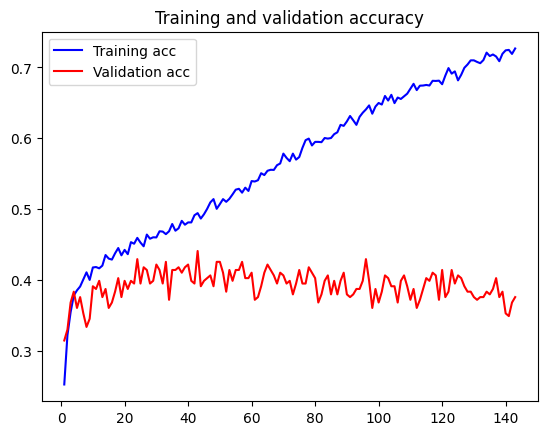

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

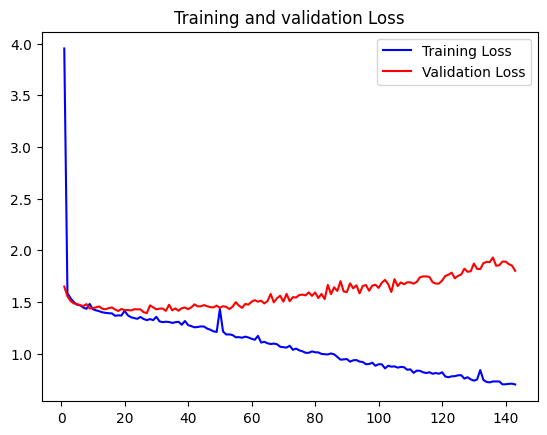

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_mfcc20_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 2s 15ms/step
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       382
           1       0.44      0.25      0.32       381
           2       0.42      0.25      0.32       381
           3       0.39      0.46      0.42       382
           4       0.37      0.57      0.45       326
           5       0.51      0.62      0.56       381

    accuracy                           0.46      2233
   macro avg       0.46      0.46      0.45      2233
weighted avg       0.46      0.46      0.45      2233



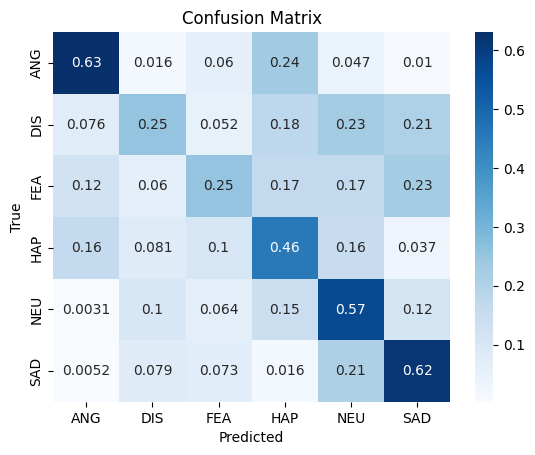

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Disgust and Fear as they have the lowest percentage of correctly classified labels, 0.25 and 0.25 respectively.

The addition of spectral rolloff improved disgust by almost double.

#### Using LDA

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_mfcc20.csv')
extracted_features_labels.shape

(7442, 183)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=20)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=183)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=20,melspectrogram=True,spectral_rolloff=True,chroma=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'melspectrogram_120', 'melspectrogram_121', 'melspectrogram_122',
       'melspectrogram_123', 'melspectrogram_124', 'melspectrogram_125',
       'melspectrogram_126', 'melspectrogram_127', 'spectral_rolloff_',
       'labels'],
      dtype='object', length=164)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  melspectrogram_120  melspectrogram_121  \
0                  126.714439  ...        1.728117e-12        9.800693e-13   
1                  141.738846  ...        7.311606e-11        7.245975e-11   
2                  120.016312  ...        8.633153e-09        8.547902e-09   
3                  125.692116  ...        3.348467e-09        3.313621e-09   
4                  129.784485  ...        1.110888e-09        1.098608e-09   

   melspectrogram_122  melspectrogram_123  melspectrogram_124  \
0         1397.463984         1529.453717         2769.952947   
1         1340.653965         1523.284488         2627.690381   
2         1301.926803         1532.288485         2592.116595   
3         1365.664118         1536.978201         2772.333442   
4         1312.662031         1506.764557         2671.463013   

   melspectrogram_125  melspectrogram_126  melspectrogram_127  \
0           20.522305           13.523137           17.490685   
1           18.949320           13.277944           15.845860   
2           20.376582           15.147682           16.980182   
3           19.721078           14.442531           17.062276   
4           18.361862           13.297212           16.916604   

   spectral_rolloff_  labels  
0          18.207274     ANG  
1          17.067751     DIS  
2          17.150892     FEA  
3          17.696191     HAP  
4          18.381072     NEU  

[5 rows x 164 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  melspectrogram_119  melspectrogram_120  \
0                  126.714439  ...        3.702384e-12        1.728117e-12   
1                  141.738846  ...        7.419814e-11        7.311606e-11   
2                  120.016312  ...        8.763475e-09        8.633153e-09   
3                  125.692116  ...        3.403508e-09        3.348467e-09   
4                  129.784485  ...        1.130958e-09        1.110888e-09   

   melspectrogram_121  melspectrogram_122  melspectrogram_123  \
0        9.800693e-13         1397.463984         1529.453717   
1        7.245975e-11         1340.653965         1523.284488   
2        8.547902e-09         1301.926803         1532.288485   
3        3.313621e-09         1365.664118         1536.978201   
4        1.098608e-09         1312.662031         1506.764557   

   melspectrogram_124  melspectrogram_125  melspectrogram_126  \
0         2769.952947           20.522305           13.523137   
1         2627.690381           18.949320           13.277944   
2         2592.116595           20.376582           15.147682   
3         2772.333442           19.721078           14.442531   
4         2671.463013           18.361862           13.297212   

   melspectrogram_127  spectral_rolloff_  
0           17.490685          18.207274  
1           15.845860          17.067751  
2           16.980182          17.150892  
3           17.062276          17.696191  
4           16.916604          18.381072  

[5 rows x 163 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 3,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3))
  # 2 strides
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  melspectrogram_119  melspectrogram_120  \
1527                   93.955490  ...        3.379370e-09        3.329460e-09   
5562                  138.557022  ...        9.877809e-10        9.710238e-10   
2407                  141.119080  ...        7.626812e-09        7.507829e-09   
4530                  144.548294  ...        1.003866e-09        9.865995e-10   
4093                  146.267792  ...        1.006873e-10        9.905057e-11   

      melspectrogram_121  melspectrogram_122  melspectrogram_123  \
1527        3.297280e-09         1965.264964         1841.063377   
5562        9.604153e-10         1236.699612         1585.707600   
2407        7.431787e-09         1135.029224         1606.587687   
4530        9.756035e-10         1265.944983         1632.154394   
4093        9.775715e-11         1309.331927         1563.274021   

      melspectrogram_124  melspectrogram_125  melspectrogram_126  \
1527         3875.720215           14.450345           14.907653   
5562         2699.426270           13.687104           14.108145   
2407         2564.015550           12.958318           13.728775   
4530         2685.447892           13.705563           14.017180   
4093         2666.681038           15.315278           14.334064   

      melspectrogram_127  spectral_rolloff_  
1527           18.927719          17.326566  
5562           16.922307          16.527073  
2407           17.072836          16.064645  
4530           16.946937          15.779695  
4093           16.291431          16.942262  

[5 rows x 163 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=100, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=200)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_LDA_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,save_metric])

Epoch 1/700
306/310 [============================>.] - ETA: 0s - loss: 1.5274 - accuracy: 0.3664
Epoch 1: val_accuracy improved from -inf to 0.41379, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_LDA_model1.best.hdf5
310/310 [==============================] - 10s 13ms/step - loss: 1.5262 - accuracy: 0.3672 - val_loss: 1.5300 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 2/700
308/310 [============================>.] - ETA: 0s - loss: 1.4168 - accuracy: 0.4280
Epoch 2: val_accuracy did not improve from 0.41379
310/310 [==============================] - 2s 7ms/step - loss: 1.4169 - accuracy: 0.4285 - val_loss: 1.4985 - val_accuracy: 0.4100 - lr: 0.0010
Epoch 3/700
310/310 [==============================] - ETA: 0s - loss: 1.3959 - accuracy: 0.4408
Epoch 3: val_accuracy improved from 0.41379 to 0.43678, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_LDA_model1.best.hdf5
310/310 [==============

<Figure size 640x480 with 0 Axes>

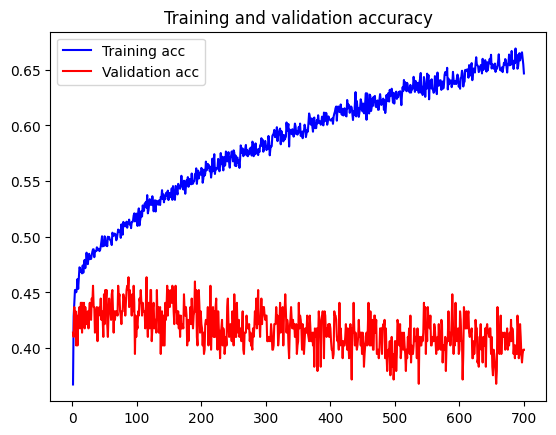

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

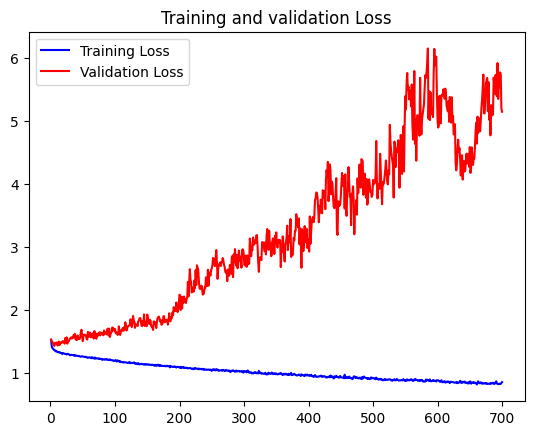

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_LDA_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       382
           1       0.36      0.27      0.31       381
           2       0.37      0.25      0.30       381
           3       0.36      0.43      0.39       382
           4       0.35      0.43      0.38       326
           5       0.53      0.63      0.57       381

    accuracy                           0.43      2233
   macro avg       0.43      0.43      0.42      2233
weighted avg       0.43      0.43      0.43      2233



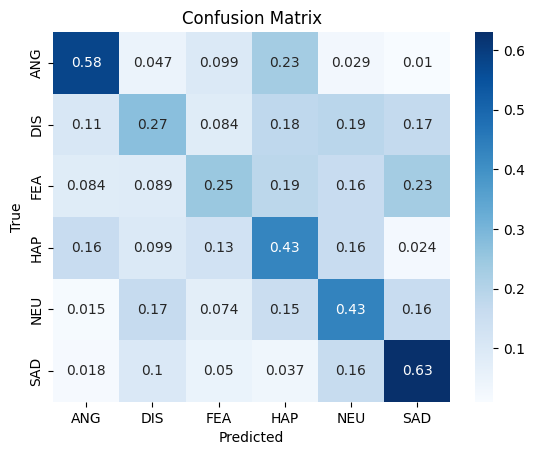

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Disgust and Fear as they have the lowest percentage of correctly classified labels, 0.27 and 0.25 respectively.

LDA improved the overall accuracies of most classes.

#### Adding Tonnetz

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_mfcc20.csv')
extracted_features_labels.shape

(7442, 183)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=20)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=183)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=20,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True)

<ipython-input-26-2f6ea728db70>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  melspectrogram_df['melspectrogram_'+str(i)]=df['melspectrogram_'+str(i)]
<ipython-input-26-2f6ea728db70>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  melspectrogram_df['melspectrogram_'+str(i)]=df['melspectrogram_'+str(i)]
<ipython-input-26-2f6ea728db70>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'melspectrogram_126', 'melspectrogram_127', 'spectral_rolloff_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=170)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  melspectrogram_126  melspectrogram_127  \
0                  126.714439  ...           13.523137           17.490685   
1                  141.738846  ...           13.277944           15.845860   
2                  120.016312  ...           15.147682           16.980182   
3                  125.692116  ...           14.442531           17.062276   
4                  129.784485  ...           13.297212           16.916604   

   spectral_rolloff_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0          18.207274   0.073405   0.040449   0.660159   0.702062   0.689090   
1          17.067751   0.066116   0.015537   0.718357   0.745182   0.662129   
2          17.150892   0.058807   0.043968   0.626592   0.678205   0.660260   
3          17.696191   0.061144   0.040781   0.655499   0.664553   0.682299   
4          18.381072   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 170 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  melspectrogram_125  melspectrogram_126  \
0                  126.714439  ...           20.522305           13.523137   
1                  141.738846  ...           18.949320           13.277944   
2                  120.016312  ...           20.376582           15.147682   
3                  125.692116  ...           19.721078           14.442531   
4                  129.784485  ...           18.361862           13.297212   

   melspectrogram_127  spectral_rolloff_  tonnetz_0  tonnetz_1  tonnetz_2  \
0           17.490685          18.207274   0.073405   0.040449   0.660159   
1           15.845860          17.067751   0.066116   0.015537   0.718357   
2           16.980182          17.150892   0.058807   0.043968   0.626592   
3           17.062276          17.696191   0.061144   0.040781   0.655499   
4           16.916604          18.381072   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 169 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 3,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3))
  # 2 strides
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  melspectrogram_125  melspectrogram_126  \
1527                   93.955490  ...           14.450345           14.907653   
5562                  138.557022  ...           13.687104           14.108145   
2407                  141.119080  ...           12.958318           13.728775   
4530                  144.548294  ...           13.705563           14.017180   
4093                  146.267792  ...           15.315278           14.334064   

      melspectrogram_127  spectral_rolloff_  tonnetz_0  tonnetz_1  tonnetz_2  \
1527           18.927719          17.326566   0.123692   0.055352   0.602927   
5562           16.922307          16.527073   0.052077   0.015425   0.615742   
2407           17.072836          16.064645   0.044926   0.011962   0.568480   
4530           16.946937          15.779695   0.059480   0.014358   0.574406   
4093           16.291431          16.942262   0.061845   0.026991   0.564718   

      tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.614756   0.564661   0.622174  
5562   0.596831   0.567270   0.615401  
2407   0.588500   0.573872   0.594684  
4530   0.583643   0.558583   0.551834  
4093   0.659557   0.757888   0.650629  

[5 rows x 169 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=40, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_tonnetz_LDA_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[checkpoint,es,save_metric])

Epoch 1/700
305/310 [============================>.] - ETA: 0s - loss: 1.5261 - accuracy: 0.3594
Epoch 1: val_accuracy improved from -inf to 0.40613, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_tonnetz_LDA_model1.best.hdf5
310/310 [==============================] - 8s 11ms/step - loss: 1.5265 - accuracy: 0.3593 - val_loss: 1.5254 - val_accuracy: 0.4061
Epoch 2/700
304/310 [============================>.] - ETA: 0s - loss: 1.4270 - accuracy: 0.4200
Epoch 2: val_accuracy improved from 0.40613 to 0.44828, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_tonnetz_LDA_model1.best.hdf5
310/310 [==============================] - 2s 7ms/step - loss: 1.4306 - accuracy: 0.4188 - val_loss: 1.4489 - val_accuracy: 0.4483
Epoch 3/700
305/310 [============================>.] - ETA: 0s - loss: 1.3969 - accuracy: 0.4393
Epoch 3: val_accuracy did not improve from 0.44828
310/310 [=========================

<Figure size 640x480 with 0 Axes>

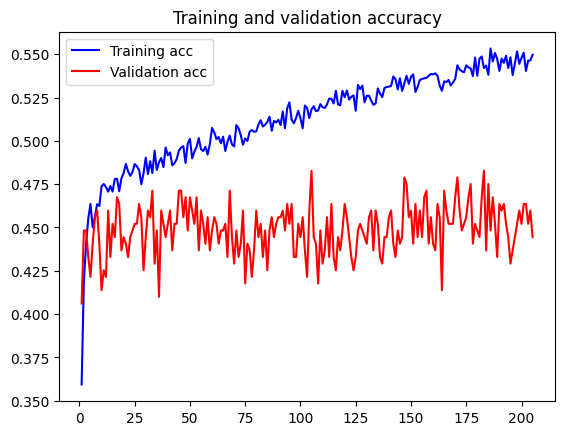

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

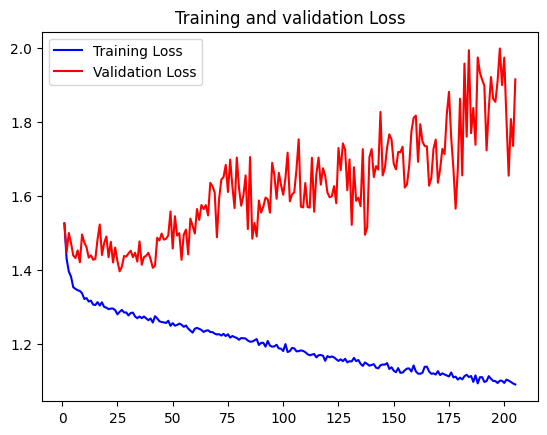

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc20_tonnetz_LDA_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       382
           1       0.35      0.35      0.35       381
           2       0.37      0.28      0.32       381
           3       0.36      0.37      0.36       382
           4       0.37      0.43      0.40       326
           5       0.53      0.65      0.59       381

    accuracy                           0.43      2233
   macro avg       0.43      0.43      0.43      2233
weighted avg       0.44      0.43      0.43      2233



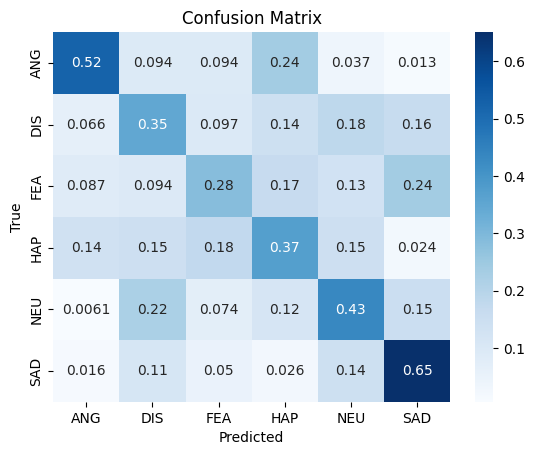

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Disgust Fear and Happy as they have the lowest percentage of correctly classified labels, 0.35, 0.28 and 0.37
respectively.
Happy and disgust tied for second to last place only due to tonnetz improving the disgust classification accuracy


#### Switching To MFCC (n=100)

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'melspectrogram_126', 'melspectrogram_127', 'spectral_rolloff_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=250)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  melspectrogram_126  melspectrogram_127  \
0                  126.714439  ...           13.523137           17.490685   
1                  141.738846  ...           13.277944           15.845860   
2                  120.016312  ...           15.147682           16.980182   
3                  125.692116  ...           14.442531           17.062276   
4                  129.784485  ...           13.297212           16.916604   

   spectral_rolloff_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0          18.207274   0.073405   0.040449   0.660159   0.702062   0.689090   
1          17.067751   0.066116   0.015537   0.718357   0.745182   0.662129   
2          17.150892   0.058807   0.043968   0.626592   0.678205   0.660260   
3          17.696191   0.061144   0.040781   0.655499   0.664553   0.682299   
4          18.381072   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 250 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  melspectrogram_125  melspectrogram_126  \
0                  126.714439  ...           20.522305           13.523137   
1                  141.738846  ...           18.949320           13.277944   
2                  120.016312  ...           20.376582           15.147682   
3                  125.692116  ...           19.721078           14.442531   
4                  129.784485  ...           18.361862           13.297212   

   melspectrogram_127  spectral_rolloff_  tonnetz_0  tonnetz_1  tonnetz_2  \
0           17.490685          18.207274   0.073405   0.040449   0.660159   
1           15.845860          17.067751   0.066116   0.015537   0.718357   
2           16.980182          17.150892   0.058807   0.043968   0.626592   
3           17.062276          17.696191   0.061144   0.040781   0.655499   
4           16.916604          18.381072   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 249 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 3,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3))
  # 2 strides
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  melspectrogram_125  melspectrogram_126  \
1527                   93.955490  ...           14.450345           14.907653   
5562                  138.557022  ...           13.687104           14.108145   
2407                  141.119080  ...           12.958318           13.728775   
4530                  144.548294  ...           13.705563           14.017180   
4093                  146.267792  ...           15.315278           14.334064   

      melspectrogram_127  spectral_rolloff_  tonnetz_0  tonnetz_1  tonnetz_2  \
1527           18.927719          17.326566   0.123692   0.055352   0.602927   
5562           16.922307          16.527073   0.052077   0.015425   0.615742   
2407           17.072836          16.064645   0.044926   0.011962   0.568480   
4530           16.946937          15.779695   0.059480   0.014358   0.574406   
4093           16.291431          16.942262   0.061845   0.026991   0.564718   

      tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.614756   0.564661   0.622174  
5562   0.596831   0.567270   0.615401  
2407   0.588500   0.573872   0.594684  
4530   0.583643   0.558583   0.551834  
4093   0.659557   0.757888   0.650629  

[5 rows x 249 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_LDA_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
305/310 [============================>.] - ETA: 0s - loss: 1.4800 - accuracy: 0.3844
Epoch 1: val_accuracy improved from -inf to 0.45977, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_LDA_model1.best.hdf5
310/310 [==============================] - 4s 6ms/step - loss: 1.4785 - accuracy: 0.3852 - val_loss: 1.4203 - val_accuracy: 0.4598 - lr: 0.0010
Epoch 2/700
306/310 [============================>.] - ETA: 0s - loss: 1.3547 - accuracy: 0.4647
Epoch 2: val_accuracy did not improve from 0.45977
310/310 [==============================] - 2s 7ms/step - loss: 1.3543 - accuracy: 0.4646 - val_loss: 1.4567 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 3/700
310/310 [==============================] - ETA: 0s - loss: 1.3255 - accuracy: 0.4850
Epoch 3: val_accuracy did not improve from 0.45977
310/310 [==============================] - 2s 6ms/step - loss: 1.3255 - accuracy: 0.4850 - val_loss: 1.4042 - val_accuracy: 0.4559 - lr: 0.

<Figure size 640x480 with 0 Axes>

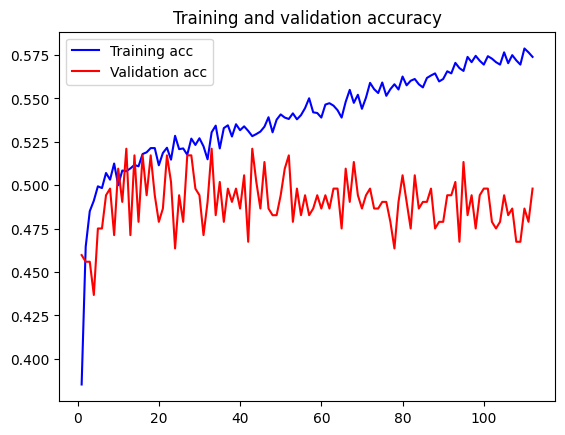

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

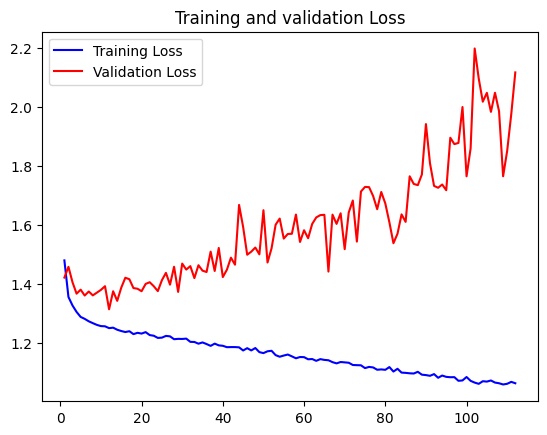

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_LDA_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.54      0.61       382
           1       0.45      0.29      0.35       381
           2       0.41      0.41      0.41       381
           3       0.37      0.45      0.40       382
           4       0.40      0.42      0.41       326
           5       0.51      0.69      0.59       381

    accuracy                           0.47      2233
   macro avg       0.47      0.46      0.46      2233
weighted avg       0.47      0.47      0.46      2233



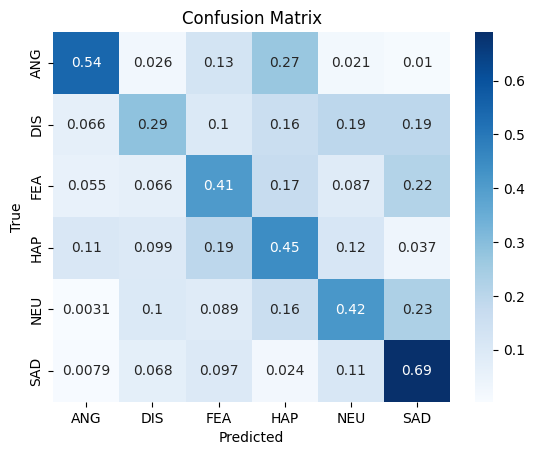

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Disgust and Fear as they have the lowest percentage of correctly classified labels, 0.29 and 0.41 respectively.

The use of mfcc n=100 lead to an overall increase in per class accuracy.


#### Adding Spectral Contrast

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_4', 'spectral_contrast_5', 'spectral_contrast_6',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=257)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0            -0.001825   0.073405   0.040449   0.660159   0.702062   0.689090   
1            -0.055103   0.066116   0.015537   0.718357   0.745182   0.662129   
2            -0.030707   0.058807   0.043968   0.626592   0.678205   0.660260   
3            -0.065497   0.061144   0.040781   0.655499   0.664553   0.682299   
4            -0.010604   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 257 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_3  spectral_contrast_4  \
0                  126.714439  ...             1.080681            -0.003190   
1                  141.738846  ...             0.450756            -0.009453   
2                  120.016312  ...             1.117468            -0.007598   
3                  125.692116  ...             1.086504             0.017944   
4                  129.784485  ...             0.494205             0.016330   

   spectral_contrast_5  spectral_contrast_6  tonnetz_0  tonnetz_1  tonnetz_2  \
0             0.008633            -0.001825   0.073405   0.040449   0.660159   
1            -0.030335            -0.055103   0.066116   0.015537   0.718357   
2             0.053141            -0.030707   0.058807   0.043968   0.626592   
3             0.044451            -0.065497   0.061144   0.040781   0.655499   
4             0.010619            -0.010604   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 256 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 3,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3))
  # 2 strides
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_3  \
1527                   93.955490  ...             1.097631   
5562                  138.557022  ...             0.338788   
2407                  141.119080  ...             0.256904   
4530                  144.548294  ...             0.302809   
4093                  146.267792  ...             0.626115   

      spectral_contrast_4  spectral_contrast_5  spectral_contrast_6  \
1527            -0.012353            -0.018718            -0.034307   
5562            -0.029762            -0.025168            -0.052351   
2407             0.021776            -0.049518            -0.053909   
4530             0.016184            -0.011953            -0.002536   
4093             0.049344            -0.048352            -0.034110   

      tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.123692   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.052077   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.044926   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.059480   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.061845   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 256 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=100, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=200)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_LDA_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
307/310 [============================>.] - ETA: 0s - loss: 1.4553 - accuracy: 0.3992
Epoch 1: val_accuracy improved from -inf to 0.48276, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_LDA_model1.best.hdf5
310/310 [==============================] - 4s 7ms/step - loss: 1.4545 - accuracy: 0.3996 - val_loss: 1.4338 - val_accuracy: 0.4828 - lr: 0.0010
Epoch 2/700
306/310 [============================>.] - ETA: 0s - loss: 1.3229 - accuracy: 0.4892
Epoch 2: val_accuracy improved from 0.48276 to 0.49425, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_LDA_model1.best.hdf5
310/310 [==============================] - 2s 5ms/step - loss: 1.3235 - accuracy: 0.4879 - val_loss: 1.4174 - val_accuracy: 0.4943 - lr: 0.0010
Epoch 3/700
303/310 [============================>.] - ETA: 0s - loss: 1.3023 - accuracy: 0.4986
Epoch 3: val_accuracy improved from 0.49

<Figure size 640x480 with 0 Axes>

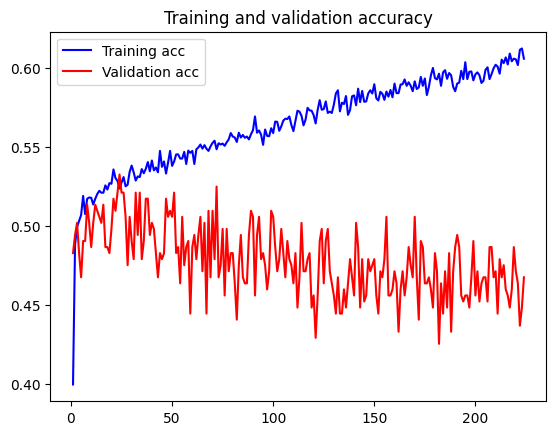

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

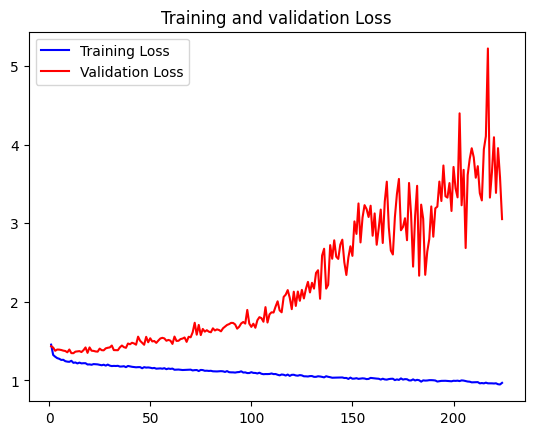

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_LDA_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       382
           1       0.42      0.36      0.39       381
           2       0.38      0.33      0.35       381
           3       0.43      0.33      0.37       382
           4       0.41      0.42      0.42       326
           5       0.49      0.73      0.59       381

    accuracy                           0.47      2233
   macro avg       0.47      0.47      0.46      2233
weighted avg       0.47      0.47      0.46      2233



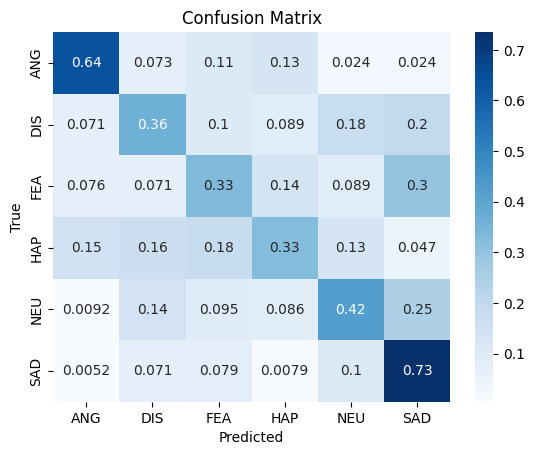

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Fear and Happy as they have the lowest percentage of correctly classified labels, 0.33 and 0.33 respectively and disgust is a close second at 0.36.
The addition of spectral contrast greatly improved Disgust's accuracy pulling it from the bottom rank.

#### Adding Spectral Flatness

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True)

<ipython-input-27-9ad77ab20a4b>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features['mfcc_'+str(i)]=mfcc_df['mfcc_'+str(i)]
<ipython-input-27-9ad77ab20a4b>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features['mfcc_'+str(i)]=mfcc_df['mfcc_'+str(i)]
<ipython-input-27-9ad77ab20a4b>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=258)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 258 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 257 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 3,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3))
  # 2 strides
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 257 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_LDA_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
302/310 [============================>.] - ETA: 0s - loss: 1.4703 - accuracy: 0.4007
Epoch 1: val_accuracy improved from -inf to 0.46743, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_LDA_model1.best.hdf5
310/310 [==============================] - 4s 6ms/step - loss: 1.4650 - accuracy: 0.4028 - val_loss: 1.4433 - val_accuracy: 0.4674 - lr: 0.0010
Epoch 2/700
302/310 [============================>.] - ETA: 0s - loss: 1.3352 - accuracy: 0.4783
Epoch 2: val_accuracy improved from 0.46743 to 0.51724, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_LDA_model1.best.hdf5
310/310 [==============================] - 2s 6ms/step - loss: 1.3344 - accuracy: 0.4788 - val_loss: 1.3951 - val_accuracy: 0.5172 - lr: 0.0010
Epoch 3/700
304/310 [============================>.] - ETA: 0s - loss: 1.2889 - accuracy: 0.5051
Epoch 3: val_accuracy 

<Figure size 640x480 with 0 Axes>

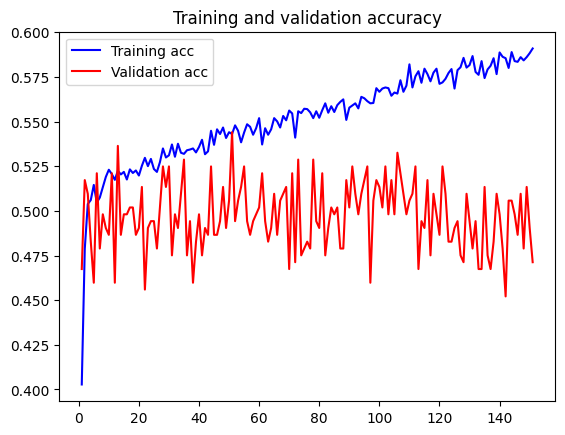

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

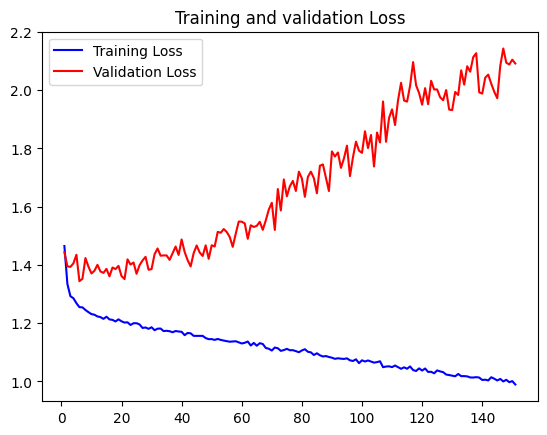

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_LDA_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       382
           1       0.43      0.35      0.39       381
           2       0.40      0.34      0.37       381
           3       0.44      0.37      0.40       382
           4       0.41      0.41      0.41       326
           5       0.48      0.73      0.58       381

    accuracy                           0.48      2233
   macro avg       0.47      0.47      0.47      2233
weighted avg       0.47      0.48      0.47      2233



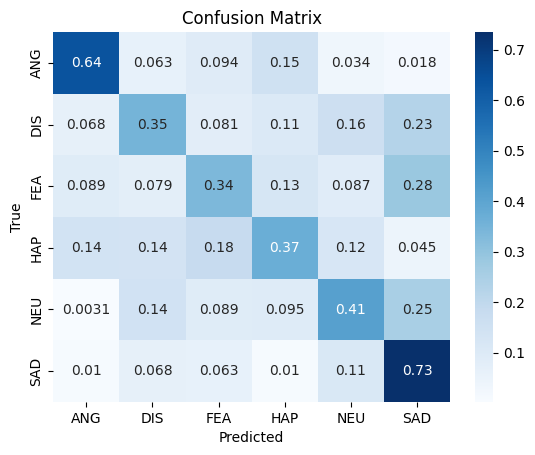

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Disgust and Fear as they have the lowest percentage of correctly classified labels, 0.35 and 0.34 respectively.

Happiness was slightly improved.

#### Adding Spectral Bandwidth

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True,spectral_bandwidth=True)

<ipython-input-27-9ad77ab20a4b>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features['mfcc_'+str(i)]=mfcc_df['mfcc_'+str(i)]
<ipython-input-27-9ad77ab20a4b>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features['mfcc_'+str(i)]=mfcc_df['mfcc_'+str(i)]
<ipython-input-27-9ad77ab20a4b>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=259)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 259 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 258 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 3,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3))
  # 2 strides
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 3,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=3,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 258 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=40, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 1.4726 - accuracy: 0.3804
Epoch 1: val_accuracy improved from -inf to 0.47126, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model1.best.hdf5
310/310 [==============================] - 5s 8ms/step - loss: 1.4726 - accuracy: 0.3804 - val_loss: 1.4719 - val_accuracy: 0.4713 - lr: 0.0010
Epoch 2/700
301/310 [============================>.] - ETA: 0s - loss: 1.3230 - accuracy: 0.4855
Epoch 2: val_accuracy improved from 0.47126 to 0.49042, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model1.best.hdf5
310/310 [==============================] - 2s 5ms/step - loss: 1.3216 - accuracy: 0.4873 - val_loss: 1.4362 - val_accuracy: 0.4904 - lr: 0.0010
Epoch 3/700
304/310 [============================>.] - ETA: 0s - loss: 1.2970 - accuracy: 0.4955
Ep

<Figure size 640x480 with 0 Axes>

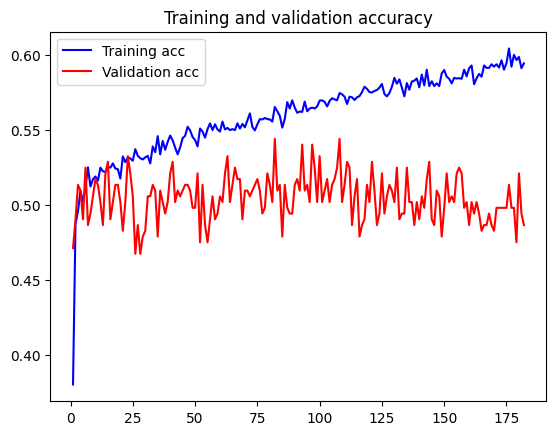

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

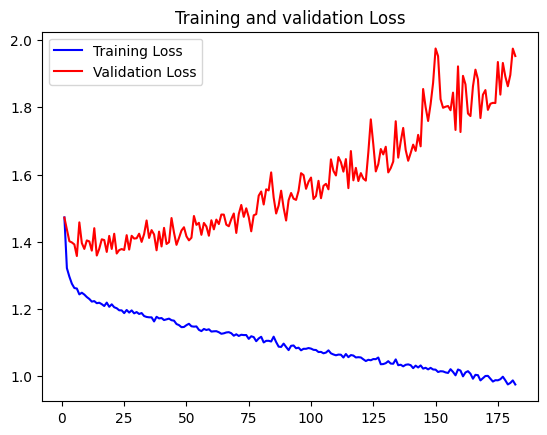

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       382
           1       0.44      0.35      0.39       381
           2       0.43      0.34      0.38       381
           3       0.41      0.42      0.41       382
           4       0.38      0.41      0.39       326
           5       0.50      0.72      0.59       381

    accuracy                           0.48      2233
   macro avg       0.47      0.47      0.47      2233
weighted avg       0.48      0.48      0.47      2233



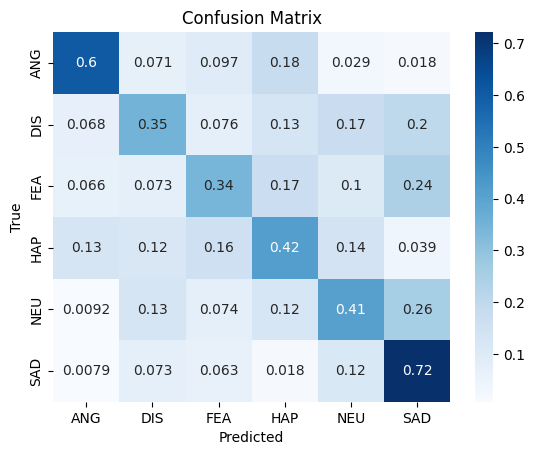

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
The most of confusing classes are Disgust, Fear and Neutral as they have the lowest percentage of correctly classified labels,  0.35 ,0.34 and 0.41
respectively.

Sadness is greatly improved by the use of spectral bandwidth

#### Adding PCA n=10

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True,spectral_bandwidth=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=259)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 259 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 258 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

In [ ]:
# lda = LDA(n_components=5)
# X_train_lda = lda.fit_transform(X_train, y_train)
# X_test_lda = lda.transform(X_test)
# X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_pca, axis=2)
x_valcnn = np.expand_dims(X_val_pca, axis=2)
x_testcnn=np.expand_dims(X_test_pca,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 5,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5))
  # 2 strides
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 258 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_PCA_n_10_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 1.9094 - accuracy: 0.2427
Epoch 1: val_accuracy improved from -inf to 0.32567, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_PCA_n_10_model1.best.hdf5
310/310 [==============================] - 4s 7ms/step - loss: 1.9094 - accuracy: 0.2427 - val_loss: 1.5779 - val_accuracy: 0.3257 - lr: 0.0010
Epoch 2/700
307/310 [============================>.] - ETA: 0s - loss: 1.5896 - accuracy: 0.3194
Epoch 2: val_accuracy did not improve from 0.32567
310/310 [==============================] - 2s 5ms/step - loss: 1.5902 - accuracy: 0.3191 - val_loss: 1.6624 - val_accuracy: 0.2874 - lr: 0.0010
Epoch 3/700
304/310 [============================>.] - ETA: 0s - loss: 1.5540 - accuracy: 0.3324
Epoch 3: val_accuracy did not improve from 0.32567
310/310 [==============================] - 2s 5ms/step - loss: 1.5538 - accuracy: 0.3327 - val_loss: 1.522

<Figure size 640x480 with 0 Axes>

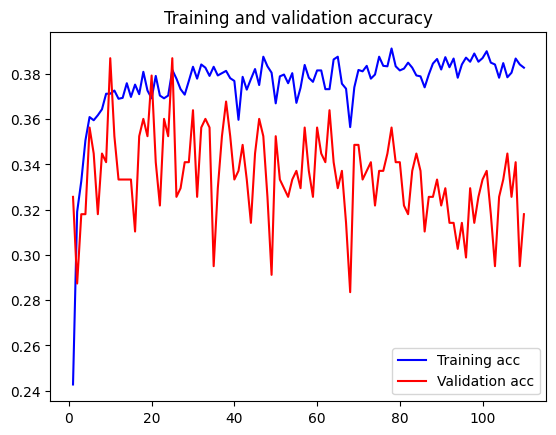

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

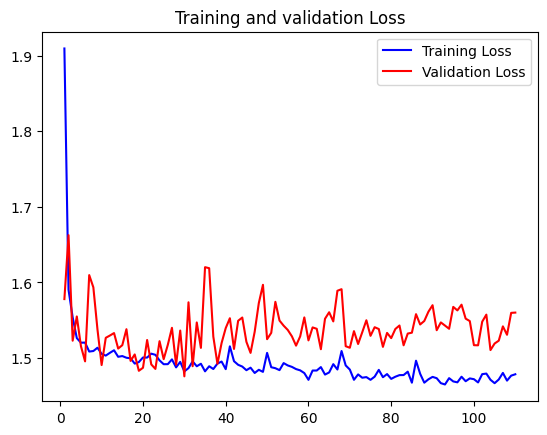

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_PCA_n_10_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       382
           1       0.00      0.00      0.00       381
           2       0.00      0.00      0.00       381
           3       0.29      0.30      0.30       382
           4       0.28      0.42      0.34       326
           5       0.36      0.87      0.51       381

    accuracy                           0.38      2233
   macro avg       0.25      0.38      0.29      2233
weighted avg       0.25      0.38      0.29      2233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


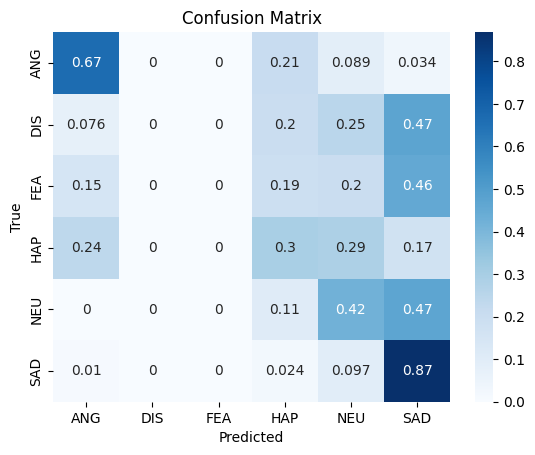

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comments
Using PCA (n=10) with our model leads to it not classifying any of the testing samples as disgust or fear. Changing the number of components may be helpful.

#### Adding PCA n=20

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True,spectral_bandwidth=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=259)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 259 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 258 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

In [ ]:
# lda = LDA(n_components=5)
# X_train_lda = lda.fit_transform(X_train, y_train)
# X_test_lda = lda.transform(X_test)
# X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_pca, axis=2)
x_valcnn = np.expand_dims(X_val_pca, axis=2)
x_testcnn=np.expand_dims(X_test_pca,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model1(input_size):
  cnn_model = Sequential()
  # 1 stride
  cnn_model.add(Conv1D(512, 5,padding='same',input_shape=(input_size, 1), activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5))
  # 2 strides
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  cnn_model.add(Conv1D(128, 5,padding='same',activation='relu'))
  # max pool
  cnn_model.add(MaxPool1D( pool_size=5,padding='same'))
  # dropout
  cnn_model.add(Dropout(0.5))
  # flatten to add fully connected layer
  cnn_model.add(Flatten())
  # fully connected layer
  cnn_model.add(Dense(512, activation ='relu'))
  # dropout
  cnn_model.add(Dropout(0.5))
   # fully connected layer
  cnn_model.add(Dense(64, activation ='relu'))
  # output layer
  cnn_model.add(Dense(6, activation='softmax'))
  cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return cnn_model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 258 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model1(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_PCA_n_20_model1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 2.1830 - accuracy: 0.2257
Epoch 1: val_accuracy improved from -inf to 0.31801, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_PCA_n_20_model1.best.hdf5
310/310 [==============================] - 4s 7ms/step - loss: 2.1830 - accuracy: 0.2257 - val_loss: 1.6340 - val_accuracy: 0.3180 - lr: 0.0010
Epoch 2/700
307/310 [============================>.] - ETA: 0s - loss: 1.6015 - accuracy: 0.3208
Epoch 2: val_accuracy improved from 0.31801 to 0.33333, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_PCA_n_20_model1.best.hdf5
310/310 [==============================] - 2s 5ms/step - loss: 1.6020 - accuracy: 0.3207 - val_loss: 1.5481 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/700
306/310 [============================>.] - ETA: 0s - loss: 1.5807 - accuracy:

<Figure size 640x480 with 0 Axes>

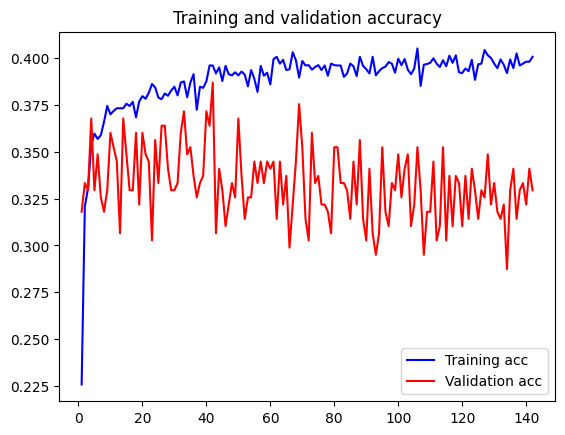

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

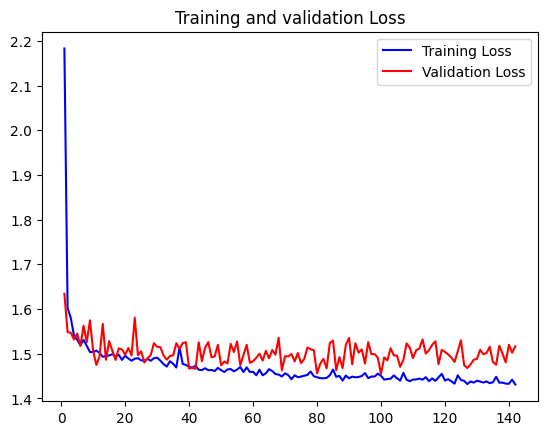

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_PCA_n_20_model1.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       382
           1       0.00      0.00      0.00       381
           2       0.00      0.00      0.00       381
           3       0.30      0.43      0.36       382
           4       0.30      0.45      0.36       326
           5       0.41      0.80      0.54       381

    accuracy                           0.39      2233
   macro avg       0.27      0.40      0.31      2233
weighted avg       0.27      0.39      0.31      2233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


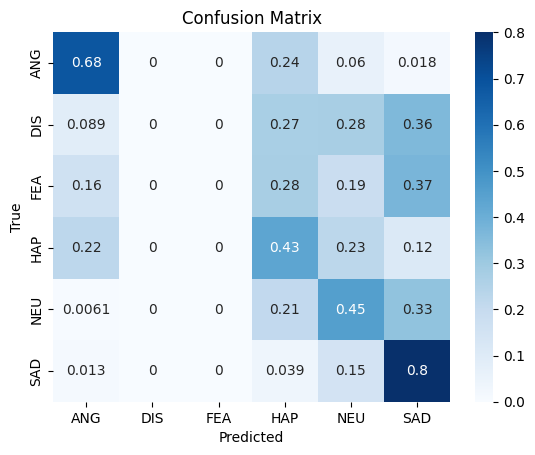

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comments
Using PCA (n=20) with our model leads to it not classifying any of the testing samples as disgust or fear. Changing the number of components did not help.

### Model 2

#### Using previous features (No LDA)

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/ CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True,spectral_bandwidth=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=259)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 259 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 258 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
# lda = LDA(n_components=5)
# X_train_lda = lda.fit_transform(X_train, y_train)
# X_test_lda = lda.transform(X_test)
# X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn=np.expand_dims(X_test,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model2(input_size):
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same',input_shape=(input_size,1)))
  model.add(Activation('relu'))
  model.add(Conv1D(256, 8, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling1D(pool_size=(8)))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling1D(pool_size=(8)))
  model.add(Conv1D(64, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Flatten())
  # Edit according to target class no.
  model.add(Dense(6))
  model.add(Activation('softmax'))
  opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
  model.compile(loss = 'categorical_crossentropy',optimizer =opt,metrics = ['accuracy'])
  return model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 258 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model2(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_model2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 1.8139 - accuracy: 0.1821
Epoch 1: val_accuracy improved from -inf to 0.17241, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_model2.best.hdf5
310/310 [==============================] - 21s 20ms/step - loss: 1.8139 - accuracy: 0.1821 - val_loss: 1.7765 - val_accuracy: 0.1724 - lr: 1.0000e-04
Epoch 2/700
309/310 [============================>.] - ETA: 0s - loss: 1.7833 - accuracy: 0.2017
Epoch 2: val_accuracy improved from 0.17241 to 0.18391, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_model2.best.hdf5
310/310 [==============================] - 4s 13ms/step - loss: 1.7833 - accuracy: 0.2017 - val_loss: 1.7627 - val_accuracy: 0.1839 - lr: 1.0000e-04
Epoch 3/700
308/310 [============================>.] - ETA: 0s - loss: 1.7748 - accuracy: 0.2104

<Figure size 640x480 with 0 Axes>

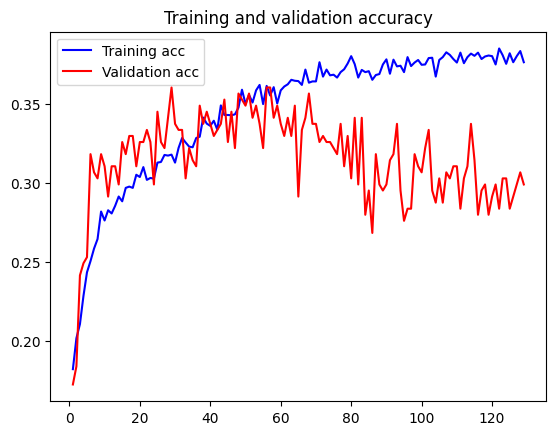

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

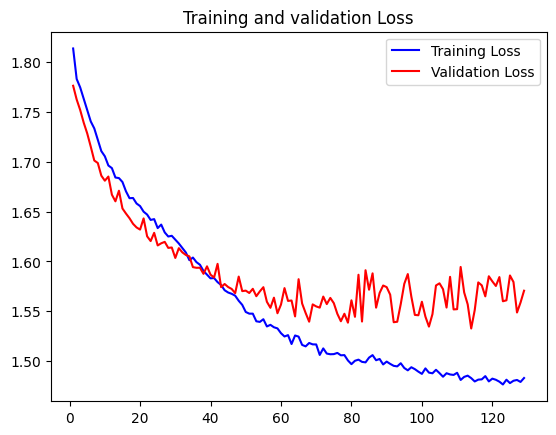

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_model2.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.43      0.81      0.56       382
           1       0.25      0.13      0.17       381
           2       0.00      0.00      0.00       381
           3       0.23      0.32      0.27       382
           4       0.28      0.02      0.05       326
           5       0.35      0.69      0.46       381

    accuracy                           0.34      2233
   macro avg       0.26      0.33      0.25      2233
weighted avg       0.26      0.34      0.26      2233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


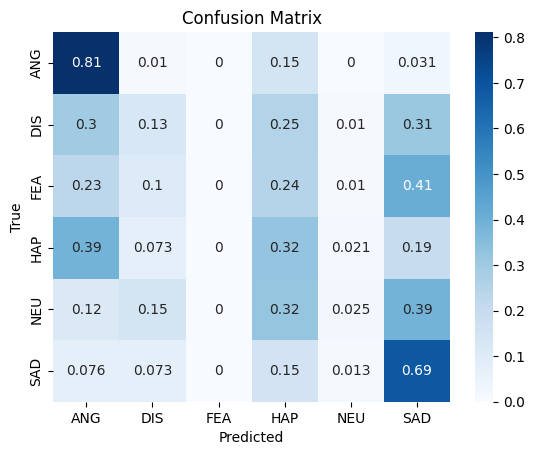

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comments
This model does not predict any testing data as fear and very few as neutral making them the most confusing classes.

Switching from SGD to Adam optimizer may be beneficial.

####Using Adam opt and slower plateau

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True,spectral_bandwidth=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=259)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 259 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 258 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
# lda = LDA(n_components=5)
# X_train_lda = lda.fit_transform(X_train, y_train)
# X_test_lda = lda.transform(X_test)
# X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn=np.expand_dims(X_test,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model2(input_size):
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same',input_shape=(input_size,1)))
  model.add(Activation('relu'))
  model.add(Conv1D(256, 8, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling1D(pool_size=(8)))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling1D(pool_size=(8)))
  model.add(Conv1D(64, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Flatten())
  # Edit according to target class no.
  model.add(Dense(6))
  model.add(Activation('softmax'))
  #opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
  model.compile(loss = 'categorical_crossentropy',optimizer ="Adam",metrics = ['accuracy'])
  return model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 258 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model2(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_using_Adam_model2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 1.7484 - accuracy: 0.2423
Epoch 1: val_accuracy improved from -inf to 0.17241, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_using_Adam_model2.best.hdf5
310/310 [==============================] - 9s 15ms/step - loss: 1.7484 - accuracy: 0.2423 - val_loss: 2.2674 - val_accuracy: 0.1724 - lr: 0.0010
Epoch 2/700
309/310 [============================>.] - ETA: 0s - loss: 1.5685 - accuracy: 0.3265
Epoch 2: val_accuracy improved from 0.17241 to 0.33333, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_using_Adam_model2.best.hdf5
310/310 [==============================] - 4s 13ms/step - loss: 1.5685 - accuracy: 0.3264 - val_loss: 1.5763 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/700
309/310 [============================>.] - ETA: 0s - loss: 1.5220 - acc

<Figure size 640x480 with 0 Axes>

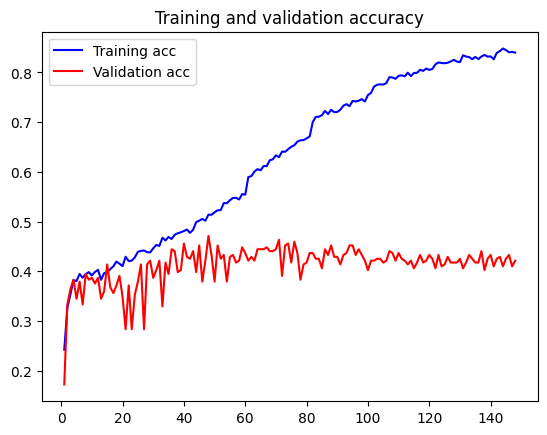

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

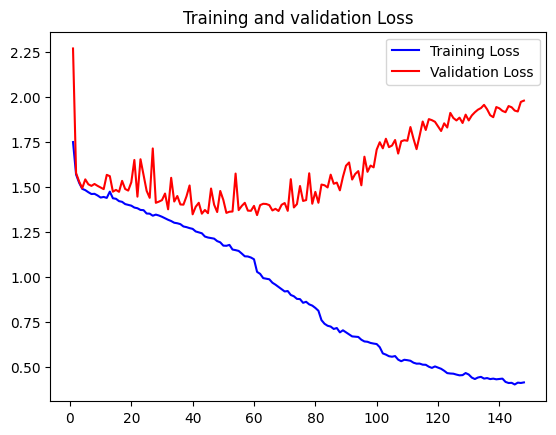

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_using_Adam_model2.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.39      0.53       382
           1       0.40      0.35      0.37       381
           2       0.54      0.23      0.32       381
           3       0.35      0.63      0.45       382
           4       0.38      0.46      0.41       326
           5       0.52      0.66      0.58       381

    accuracy                           0.45      2233
   macro avg       0.50      0.45      0.44      2233
weighted avg       0.51      0.45      0.44      2233



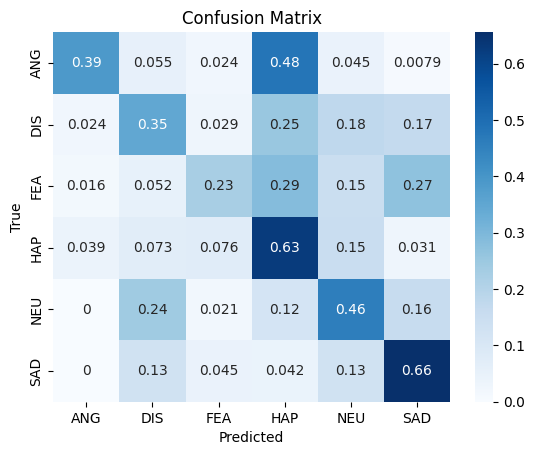

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comments
Using Adam optimizer and a slightly lower rate for LR reduction disgust and fear are being predicted again though they still remain the most confusing to classify.

#### Using LDA

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True,spectral_bandwidth=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=259)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 259 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 258 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model4(input_size):
  model = Sequential()
  model.add(Conv1D(256, 3, padding='same',input_shape=(input_size,1))) #1
  model.add(Activation('relu'))
  model.add(Conv1D(256, 3, padding='same')) #2
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling1D(pool_size=(3)))
  model.add(Conv1D(128, 3, padding='same')) #3
  model.add(Activation('relu'))
  model.add(Conv1D(128, 3, padding='same')) #4
  model.add(Activation('relu'))
  model.add(Conv1D(128, 3, padding='same')) #5
  model.add(Activation('relu'))
  model.add(Conv1D(128, 3, padding='same')) #6
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
 # max pool
  model.add(MaxPool1D( pool_size=3,padding='same'))
  model.add(Conv1D(64, 3, padding='same')) #7
  model.add(Activation('relu'))
  model.add(Conv1D(64, 3, padding='same')) #8
  model.add(Activation('relu'))
  model.add(Flatten())
  model.add(Dense(6)) #9
  model.add(Activation('softmax'))
  opt = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
  model.compile(loss = 'categorical_crossentropy',optimizer =opt,metrics = ['accuracy'])
  return model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 258 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model4(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=100, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=200)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model4.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 1.7786 - accuracy: 0.1985
Epoch 1: val_accuracy improved from -inf to 0.25287, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model4.best.hdf5
310/310 [==============================] - 7s 16ms/step - loss: 1.7786 - accuracy: 0.1985 - val_loss: 1.7869 - val_accuracy: 0.2529 - lr: 0.0010
Epoch 2/700
309/310 [============================>.] - ETA: 0s - loss: 1.7085 - accuracy: 0.3020
Epoch 2: val_accuracy improved from 0.25287 to 0.41762, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model4.best.hdf5
310/310 [==============================] - 3s 9ms/step - loss: 1.7085 - accuracy: 0.3019 - val_loss: 1.6985 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 3/700
308/310 [============================>.] - ETA: 0s - loss: 1.6296 - accuracy: 0.3764
E

<Figure size 640x480 with 0 Axes>

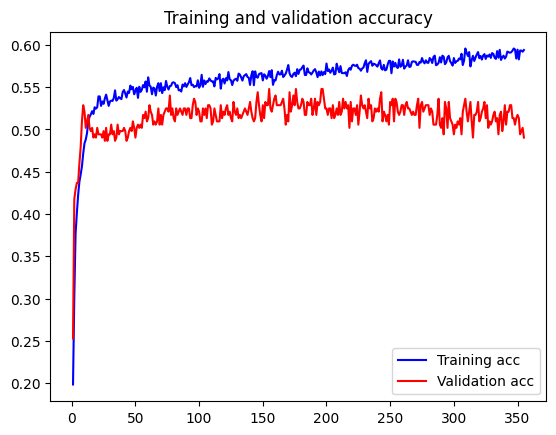

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

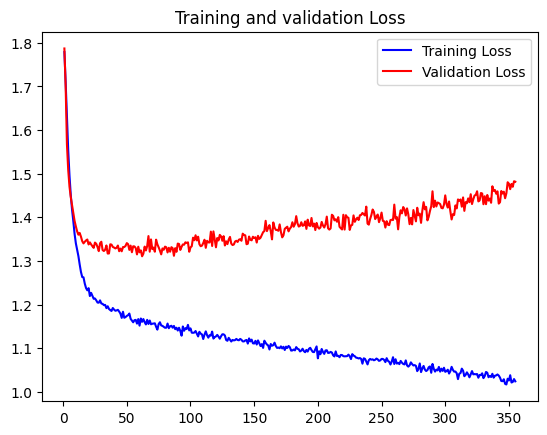

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model4.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       382
           1       0.43      0.38      0.40       381
           2       0.41      0.37      0.39       381
           3       0.39      0.42      0.41       382
           4       0.40      0.50      0.44       326
           5       0.56      0.62      0.59       381

    accuracy                           0.48      2233
   macro avg       0.48      0.48      0.48      2233
weighted avg       0.48      0.48      0.48      2233



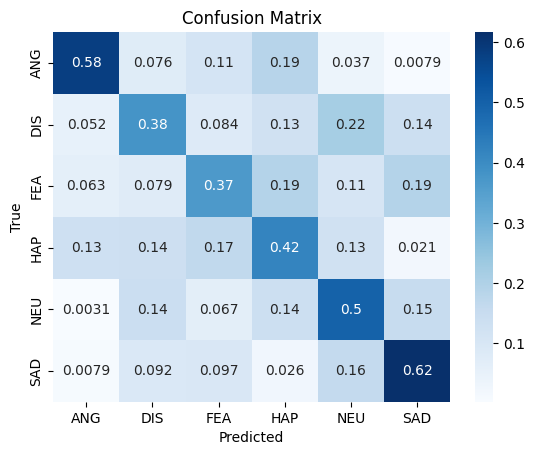

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comments
The most confusing classes are disgust and fear with values 0.38 and 0.37 respectively.

### Model 3

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True,spectral_bandwidth=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=259)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 259 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 258 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model3(input_size):
  model=Sequential()
  model.add(Conv1D(512, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(input_size, 1)))
  model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

  model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))
  model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))
  model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', activation='relu'))

  model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(6, activation='softmax'))
  opt=tensorflow.keras.optimizers.Adam(
    learning_rate=0.001
)

  model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
  return model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 258 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model3(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=100, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=200)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model3.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 1.3844 - accuracy: 0.4551
Epoch 1: val_accuracy improved from -inf to 0.37931, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model3.best.hdf5
310/310 [==============================] - 8s 9ms/step - loss: 1.3844 - accuracy: 0.4551 - val_loss: 1.4817 - val_accuracy: 0.3793 - lr: 0.0010
Epoch 2/700
309/310 [============================>.] - ETA: 0s - loss: 1.2922 - accuracy: 0.5047
Epoch 2: val_accuracy improved from 0.37931 to 0.51724, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model3.best.hdf5
310/310 [==============================] - 2s 7ms/step - loss: 1.2925 - accuracy: 0.5046 - val_loss: 1.3808 - val_accuracy: 0.5172 - lr: 0.0010
Epoch 3/700
308/310 [============================>.] - ETA: 0s - loss: 1.2769 - accuracy: 0.5132
Ep

<Figure size 640x480 with 0 Axes>

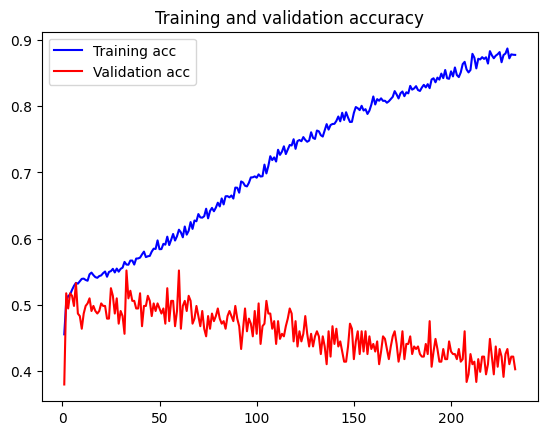

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

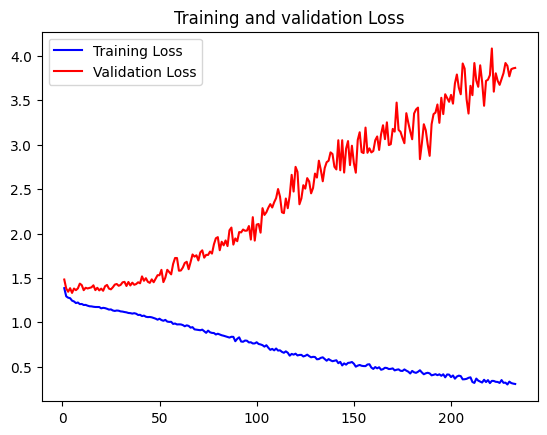

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model3.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.76      0.47      0.58       382
           1       0.44      0.33      0.38       381
           2       0.36      0.44      0.40       381
           3       0.38      0.52      0.44       382
           4       0.43      0.37      0.40       326
           5       0.52      0.59      0.55       381

    accuracy                           0.46      2233
   macro avg       0.48      0.45      0.46      2233
weighted avg       0.48      0.46      0.46      2233



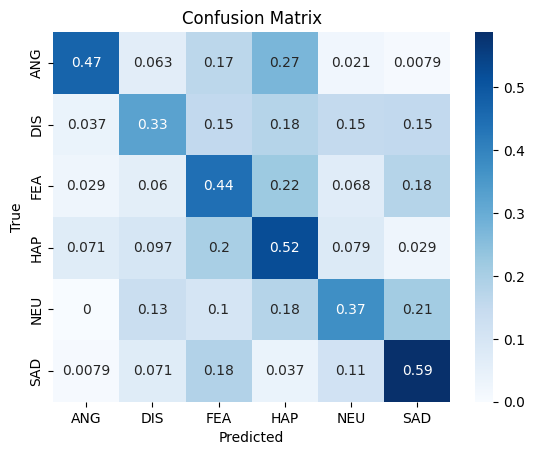

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comments
Its most confusing classes were disgust and neutrality with 0.33, and 0.37 accuracy respectively.
Fear appears to have a better score of 0.44 with this model though overall testing accuracy was 0.46.

### Model 4

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True,spectral_bandwidth=True)

<ipython-input-27-9ad77ab20a4b>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features['mfcc_'+str(i)]=mfcc_df['mfcc_'+str(i)]
<ipython-input-27-9ad77ab20a4b>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features['mfcc_'+str(i)]=mfcc_df['mfcc_'+str(i)]
<ipython-input-27-9ad77ab20a4b>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=259)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 259 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 258 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model5(input_size):

  model=Sequential()
  model.add(Conv1D(512, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(input_size, 1)))
  model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

  model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))
  model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))
  model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', activation='relu'))

  model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(6, activation='softmax'))
  opt=tensorflow.keras.optimizers.Adam(
    learning_rate=0.001
)
  model.compile(loss = 'categorical_crossentropy',optimizer ='Adam',metrics = ['accuracy'])


  return model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 258 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model5(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model5.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
310/310 [==============================] - ETA: 0s - loss: 1.3899 - accuracy: 0.4590
Epoch 1: val_accuracy improved from -inf to 0.48276, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model5.best.hdf5
310/310 [==============================] - 6s 8ms/step - loss: 1.3899 - accuracy: 0.4590 - val_loss: 1.4533 - val_accuracy: 0.4828 - lr: 0.0010
Epoch 2/700
305/310 [============================>.] - ETA: 0s - loss: 1.3026 - accuracy: 0.5096
Epoch 2: val_accuracy did not improve from 0.48276
310/310 [==============================] - 3s 8ms/step - loss: 1.3024 - accuracy: 0.5099 - val_loss: 1.4996 - val_accuracy: 0.4674 - lr: 0.0010
Epoch 3/700
310/310 [==============================] - ETA: 0s - loss: 1.2647 - accuracy: 0.5168
Epoch 3: val_accuracy did not improve from 0.48276
310/310 [==============================] - 2s 7ms/step - loss: 1.2647 - accuracy: 0.5168 - val_loss: 1.4182 - v

<Figure size 640x480 with 0 Axes>

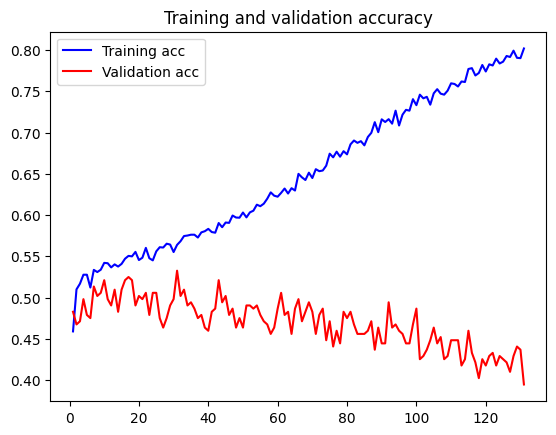

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

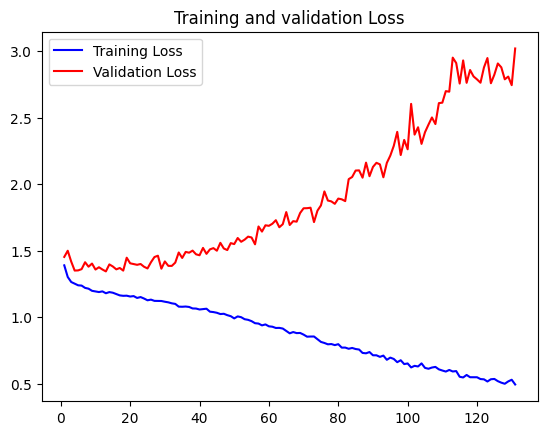

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model5.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.70      0.55      0.61       382
           1       0.41      0.39      0.40       381
           2       0.39      0.41      0.40       381
           3       0.39      0.35      0.37       382
           4       0.38      0.51      0.43       326
           5       0.55      0.57      0.56       381

    accuracy                           0.46      2233
   macro avg       0.47      0.46      0.46      2233
weighted avg       0.47      0.46      0.46      2233



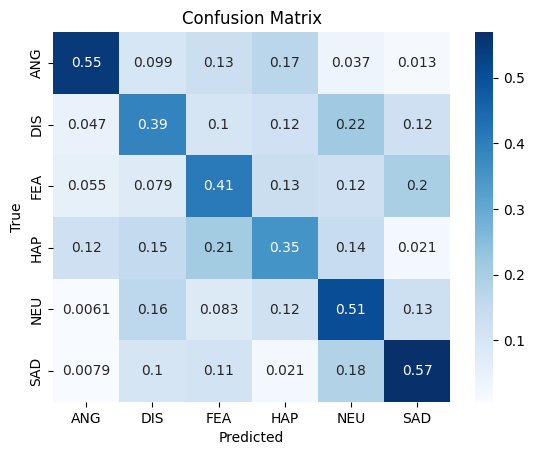

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comments
Disgust and Happiness are the most confusing classes, though Fear is a very close third at 0.41.

### Model 5 Paper implementation
Cnn, Convolutional Neural Network. "Speech emotion recognition using convolutional neural network (CNN)." International Journal of Psychosocial Rehabilitation 24.8 (2020): 1-20

DOI:10.37200/IJPR/V24I8/PR280260

In [ ]:
loaded_df_mfcc20_mel_roll_chroma=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features_mfcc20.csv')
loaded_df_mfcc20_mel_roll_chroma.shape

(7442, 183)

In [ ]:
loaded_df_mfcc20_mel_roll_chroma=add_column_names(loaded_df_mfcc20_mel_roll_chroma,n=20)

In [ ]:
loaded_df_mfcc20_mel_roll_chroma.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=183)

In [ ]:
features_selected_mfcc20_mel_roll_chroma=features_selector(loaded_df_mfcc20_mel_roll_chroma,mfcc=True,n=20)

In [ ]:
features_selected_mfcc20_mel_roll_chroma.columns

Index(['mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
       'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19', 'labels'],
      dtype='object')

In [ ]:
features_selected_mfcc20_mel_roll_chroma.head()

mfcc_0    mfcc_1    mfcc_2     mfcc_3     mfcc_4     mfcc_5    mfcc_6  \
0 -15.391998 -7.945820 -5.337207  -7.956209  -6.508597  -5.808754 -1.041687   
1 -19.336275  1.032564 -4.046562  -9.434969  -2.145402 -10.414154  2.581147   
2 -14.484967 -3.553893 -3.162869  -7.994785  -8.584072  -7.743512 -2.013843   
3 -18.296469 -4.518619 -4.815924 -11.666108 -10.200100  -6.431186 -0.720919   
4  -9.710364 -7.123269 -5.085679 -10.168397  -5.524042  -4.099905 -2.416726   

      mfcc_7    mfcc_8     mfcc_9  ...   mfcc_11   mfcc_12   mfcc_13  \
0 -14.153826  6.700666  -9.935220  ...  0.287186 -6.150031 -5.127417   
1 -14.247907  3.316748 -12.260736  ...  0.602208 -7.687426 -4.293844   
2 -11.905601  1.560363  -9.814734  ... -2.776498 -6.703301 -5.635390   
3 -15.828364  3.271181  -9.704046  ... -0.954951 -6.378819 -5.316256   
4  -9.990394  4.952847  -8.990015  ... -0.987445 -6.760090 -2.463531   

    mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19  labels  
0  0.002945  0.005976  0.037027  0.264995  1.402983  2.726535     ANG  
1  0.001829  0.006370  0.063852  0.336360  0.214140  0.120846     DIS  
2  0.002547  0.005936  0.026407  0.051256  0.198164  0.688195     FEA  
3  0.003307  0.005886  0.023850  0.056603  0.598534  2.244174     HAP  
4  0.002267  0.009326  0.052079  0.285127  0.307519  0.247580     NEU  

[5 rows x 21 columns]

In [ ]:
labels_mfcc20_df_mel_roll_chroma=features_selected_mfcc20_mel_roll_chroma['labels']

In [ ]:
labels_mfcc20_df_mel_roll_chroma

0       ANG
1       DIS
2       FEA
3       HAP
4       NEU
       ... 
7437    DIS
7438    FEA
7439    HAP
7440    NEU
7441    SAD
Name: labels, Length: 7442, dtype: object

In [ ]:
features_selected_mfcc20_mel_roll_chroma = features_selected_mfcc20_mel_roll_chroma.iloc[:, :-1]
features_selected_mfcc20_mel_roll_chroma.head()
# labels_mfcc20_df_mel_roll_chroma = features_selected_mfcc20_mel_roll_chroma.iloc[:, -1]

mfcc_0    mfcc_1    mfcc_2     mfcc_3     mfcc_4     mfcc_5    mfcc_6  \
0 -15.391998 -7.945820 -5.337207  -7.956209  -6.508597  -5.808754 -1.041687   
1 -19.336275  1.032564 -4.046562  -9.434969  -2.145402 -10.414154  2.581147   
2 -14.484967 -3.553893 -3.162869  -7.994785  -8.584072  -7.743512 -2.013843   
3 -18.296469 -4.518619 -4.815924 -11.666108 -10.200100  -6.431186 -0.720919   
4  -9.710364 -7.123269 -5.085679 -10.168397  -5.524042  -4.099905 -2.416726   

      mfcc_7    mfcc_8     mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13  \
0 -14.153826  6.700666  -9.935220 -10.769011  0.287186 -6.150031 -5.127417   
1 -14.247907  3.316748 -12.260736  -7.734887  0.602208 -7.687426 -4.293844   
2 -11.905601  1.560363  -9.814734  -8.250978 -2.776498 -6.703301 -5.635390   
3 -15.828364  3.271181  -9.704046  -9.877846 -0.954951 -6.378819 -5.316256   
4  -9.990394  4.952847  -8.990015  -9.227773 -0.987445 -6.760090 -2.463531   

    mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19  
0  0.002945  0.005976  0.037027  0.264995  1.402983  2.726535  
1  0.001829  0.006370  0.063852  0.336360  0.214140  0.120846  
2  0.002547  0.005936  0.026407  0.051256  0.198164  0.688195  
3  0.003307  0.005886  0.023850  0.056603  0.598534  2.244174  
4  0.002267  0.009326  0.052079  0.285127  0.307519  0.247580

In [ ]:
labels_mfcc20_df_mel_roll_chroma.head

<bound method NDFrame.head of 0       ANG
1       DIS
2       FEA
3       HAP
4       NEU
       ... 
7437    DIS
7438    FEA
7439    HAP
7440    NEU
7441    SAD
Name: labels, Length: 7442, dtype: object>

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# apply PCA to reduce the number of features
# pca = PCA(n_components=20)
# # remove labels

# features_mfcc20_mel_roll_chroma = features_mfcc20_mel_roll_chroma.iloc[:, :-1]
# # apply PCA to features
# features_mfcc20_mel_roll_chroma = pca.fit_transform(features_mfcc20_mel_roll_chroma)

# # add labels back
# features_mfcc20_mel_roll_chroma = pd.DataFrame(features_mfcc20_mel_roll_chroma)


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features_selected_mfcc20_mel_roll_chroma,labels_mfcc20_df_mel_roll_chroma, test_size=0.3, random_state=42, stratify=labels_mfcc20_df_mel_roll_chroma)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

In [ ]:
# expand dimensions
x_traincnn = np.expand_dims(X_train_lda, axis=2)
x_valcnn = np.expand_dims(X_val_lda, axis=2)
x_testcnn=np.expand_dims(X_test_lda,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of          mfcc_0    mfcc_1    mfcc_2    mfcc_3    mfcc_4     mfcc_5     mfcc_6  \
4126  -8.600396  5.870154 -3.219012 -6.320945  5.665858  -7.241362   9.970066   
1327 -13.877206  4.843155 -0.994450 -3.688108  8.752863  -5.065962  10.596293   
6447 -15.638021  7.850093 -0.880286 -0.596513  5.874881  -6.833447  11.267950   
466   -3.351349  1.063131 -1.620267 -5.087644  1.434548  -9.147154   3.269617   
3932  -5.336411 -3.868886 -5.542290  0.274103  2.411873 -10.428082   0.286239   
...         ...       ...       ...       ...       ...        ...        ...   
2779 -12.903172  8.845173 -5.026839 -2.155869  7.531779 -12.413167   9.148362   
5319  -9.890828  5.128179 -9.619823 -5.608170  5.570717  -7.568853  11.902960   
3525  -3.821870  1.352687 -7.359309 -5.830619  6.241227  -6.446632   5.831973   
864  -10.371660  7.680342 -1.775359 -3.660372  8.190760  -6.830407  12.061955   
4194 -12.615895 -0.282557 -3.448395 -5.353369  3.404349  -9.999852   4.088821  

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv1D(128, 2,padding='same', input_shape=(5,1)))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 2,padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.1))
  model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
  model.add(Conv1D(128, 2,padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 2,padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 2,padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Conv1D(128, 2,padding='same'))
  model.add(Activation('relu'))
  model.add(Flatten())
  model.add(Dense(6))
  model.add(Activation('softmax'))
  #opt=tensorflow.keras.optimizers.RMSprop(learning_rate=0.001)
  model.compile(loss = 'categorical_crossentropy',optimizer ='Adam',metrics = ['accuracy',get_f1])

  return model


In [ ]:
# encode labels to numeric values
def encode_labels():
  # Build new lists of encoding labels
  y_labels_encoded = {}
  for i, label in enumerate(lb.classes_):
      y_labels_encoded[i] = label
  return y_labels_encoded

In [ ]:
lb = LabelEncoder()
# encode labels

y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb=np_utils.to_categorical(lb.transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

mfcc_0    mfcc_1     mfcc_2    mfcc_3    mfcc_4     mfcc_5  \
1527 -14.476381 -1.713578 -13.384045 -8.735784  1.693204  -9.457906   
5562 -10.511858 -1.144310  -5.283758 -4.280743  2.125836 -11.908953   
2407 -10.535636 -2.935298  -5.527678 -3.730730  5.459807  -8.798803   
4530 -17.449455  1.536956  -4.455431 -5.915397  1.861106 -11.077613   
4093  -4.850620  3.544814  -6.842366 -4.882605  8.659999  -6.420776   

         mfcc_6     mfcc_7    mfcc_8    mfcc_9   mfcc_10   mfcc_11   mfcc_12  \
1527   6.223527  -9.701426  5.306978 -2.392889 -3.258705  0.054185 -2.378454   
5562   3.829282 -11.685564  2.107088 -2.482628 -3.952413  0.260212 -1.406468   
2407   5.875926  -8.537578  0.717592 -5.715463 -3.174131 -1.582310 -6.951099   
4530  10.358575 -10.380719  0.823054 -6.994531 -1.783346  0.278721 -4.683255   
4093   7.834142 -11.721331  2.331105 -3.244993 -5.617970 -3.556615 -4.789386   

       mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19  
1527 -2.708469  0.103883  0.041601  0.064155  0.080811  0.333192  1.633486  
5562  2.921649  0.062145  0.021755  0.054790  0.211069  0.206934  0.146191  
2407  0.632264  0.044487  0.019783  0.033866  0.068116  0.065231  0.137868  
4530  3.070182  0.071547  0.026806  0.036819  0.060946  0.122236  0.458469  
4093 -0.747635  0.080434  0.037663  0.098121  0.212194  0.202632  0.861067

In [ ]:
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model()
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/weightspaper.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700
309/310 [============================>.] - ETA: 0s - loss: 1.6849 - accuracy: 0.2731 - get_f1: 0.0598
Epoch 1: val_accuracy improved from -inf to 0.32950, saving model to /content/drive/MyDrive/Kaggle_ds/weightspaper.best.hdf5
310/310 [==============================] - 7s 13ms/step - loss: 1.6848 - accuracy: 0.2730 - get_f1: 0.0596 - val_loss: 1.5835 - val_accuracy: 0.3295 - val_get_f1: 0.0887 - lr: 0.0010
Epoch 2/700
308/310 [============================>.] - ETA: 0s - loss: 1.5802 - accuracy: 0.3504 - get_f1: 0.1203
Epoch 2: val_accuracy improved from 0.32950 to 0.36782, saving model to /content/drive/MyDrive/Kaggle_ds/weightspaper.best.hdf5
310/310 [==============================] - 3s 11ms/step - loss: 1.5804 - accuracy: 0.3504 - get_f1: 0.1202 - val_loss: 1.5705 - val_accuracy: 0.3678 - val_get_f1: 0.1375 - lr: 0.0010
Epoch 3/700
309/310 [============================>.] - ETA: 0s - loss: 1.5542 - accuracy: 0.3528 - get_f1: 0.1344
Epoch 3: val_accuracy did not improve f

<Figure size 640x480 with 0 Axes>

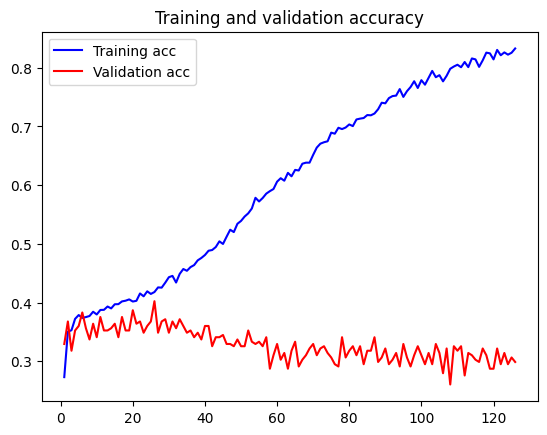

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

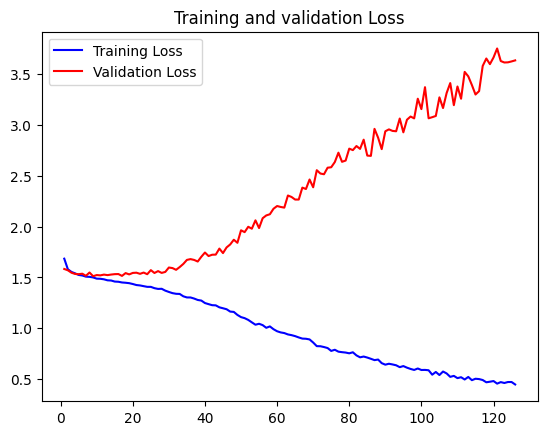

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

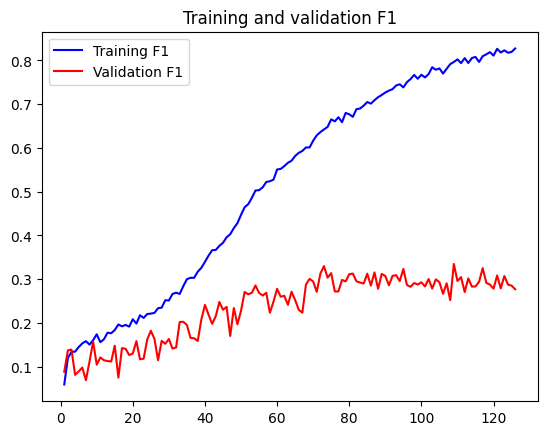

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()


In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/weightspaper.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.46      0.60      0.52       382
           1       0.35      0.22      0.27       381
           2       0.31      0.18      0.23       381
           3       0.31      0.28      0.30       382
           4       0.33      0.38      0.35       326
           5       0.41      0.58      0.48       381

    accuracy                           0.38      2233
   macro avg       0.36      0.38      0.36      2233
weighted avg       0.36      0.38      0.36      2233



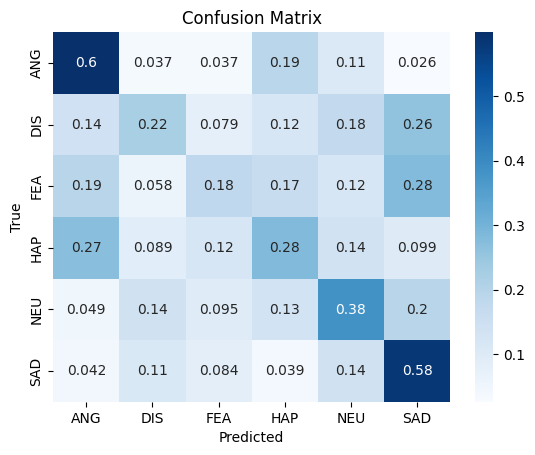

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comments
Disgust and Fear are the most confusing classes. The paper claimed 82% accuracy which was not achieved here. This may be due to the use of a different dataset. Learning rate was also not specified though we did experiment with different learning rates and settled on 0.001 as having the best accuracy but only marginally.

###Model 6

In [ ]:
extracted_features_labels=pd.read_csv('/content/drive/MyDrive/Kaggle_ds/CREMA_df_features.csv')
extracted_features_labels.shape

(7442, 263)

In [ ]:
extracted_features_labels=add_column_names(extracted_features_labels,n=100)

In [ ]:
extracted_features_labels.columns

Index(['tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'zero_crossing_rate_', 'energy_',
       'chroma_energy_normalized_0', 'chroma_energy_normalized_1',
       ...
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'poly_features_0', 'poly_features_1', 'fundamental_frequency_',
       'labels'],
      dtype='object', length=263)

In [ ]:
selected_features_labels=features_selector(extracted_features_labels,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,chroma=True,tonnetz=True,spectral_contrast=True,spectral_flatness=True,spectral_bandwidth=True)

In [ ]:
selected_features_labels.columns

Index(['zero_crossing_rate_', 'energy_', 'chroma_energy_normalized_0',
       'chroma_energy_normalized_1', 'chroma_energy_normalized_2',
       'chroma_energy_normalized_3', 'chroma_energy_normalized_4',
       'chroma_energy_normalized_5', 'chroma_energy_normalized_6',
       'chroma_energy_normalized_7',
       ...
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_flatness_',
       'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3', 'tonnetz_4',
       'tonnetz_5', 'labels'],
      dtype='object', length=259)

In [ ]:
selected_features_labels.head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_5  spectral_contrast_6  \
0                  126.714439  ...             0.008633            -0.001825   
1                  141.738846  ...            -0.030335            -0.055103   
2                  120.016312  ...             0.053141            -0.030707   
3                  125.692116  ...             0.044451            -0.065497   
4                  129.784485  ...             0.010619            -0.010604   

   spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  \
0           -0.101469   0.073405   0.040449   0.660159   0.702062   0.689090   
1           -0.040881   0.066116   0.015537   0.718357   0.745182   0.662129   
2           -0.034195   0.058807   0.043968   0.626592   0.678205   0.660260   
3           -0.030692   0.061144   0.040781   0.655499   0.664553   0.682299   
4           -0.074784   0.058782   0.019746   0.711815   0.697958   0.680827   

   tonnetz_5  labels  
0   0.684471     ANG  
1   0.679968     DIS  
2   0.658140     FEA  
3   0.690717     HAP  
4   0.682312     NEU  

[5 rows x 259 columns]

In [ ]:
labels=selected_features_labels['labels']

In [ ]:
features = selected_features_labels.iloc[:, :-1]
features.head()
# labels_mfcc20_df_mel = selected_features_labels.iloc[:, -1]

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
0             0.674981  0.579658                    0.575583   
1             0.690180  0.618542                    0.588215   
2             0.623614  0.599817                    0.592201   
3             0.676714  0.662607                    0.582536   
4             0.653490  0.601200                    0.612220   

   chroma_energy_normalized_1  chroma_energy_normalized_2  \
0                    0.632071                    0.657526   
1                    0.621079                    0.687854   
2                    0.672762                    0.691979   
3                    0.631261                    0.674817   
4                    0.648178                    0.684017   

   chroma_energy_normalized_3  chroma_energy_normalized_4  \
0                    0.742811                    0.819258   
1                    0.791835                    0.854672   
2                    0.782845                    0.824331   
3                    0.799516                    0.796907   
4                    0.748183                    0.810427   

   chroma_energy_normalized_5  chroma_energy_normalized_6  \
0                    0.746960                 -346.465271   
1                    0.758373                 -394.410004   
2                    0.668112                 -355.399567   
3                    0.681614                 -342.066833   
4                    0.767147                 -372.290070   

   chroma_energy_normalized_7  ...  spectral_contrast_4  spectral_contrast_5  \
0                  126.714439  ...            -0.003190             0.008633   
1                  141.738846  ...            -0.009453            -0.030335   
2                  120.016312  ...            -0.007598             0.053141   
3                  125.692116  ...             0.017944             0.044451   
4                  129.784485  ...             0.016330             0.010619   

   spectral_contrast_6  spectral_flatness_  tonnetz_0  tonnetz_1  tonnetz_2  \
0            -0.001825           -0.101469   0.073405   0.040449   0.660159   
1            -0.055103           -0.040881   0.066116   0.015537   0.718357   
2            -0.030707           -0.034195   0.058807   0.043968   0.626592   
3            -0.065497           -0.030692   0.061144   0.040781   0.655499   
4            -0.010604           -0.074784   0.058782   0.019746   0.711815   

   tonnetz_3  tonnetz_4  tonnetz_5  
0   0.702062   0.689090   0.684471  
1   0.745182   0.662129   0.679968  
2   0.678205   0.660260   0.658140  
3   0.664553   0.682299   0.690717  
4   0.697958   0.680827   0.682312  

[5 rows x 258 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features,labels, test_size=0.3, random_state=42, stratify=labels)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)
print(len(X_train_val))
print(len(X_val))
print(len(X_test))

5209
261
2233


In [ ]:
# lda = LDA(n_components=5)
# X_train_lda = lda.fit_transform(X_train, y_train)
# X_test_lda = lda.transform(X_test)
# X_val_lda = lda.transform(X_val)

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn=np.expand_dims(X_test,axis=2)

In [ ]:
# X_train=X_train.iloc[:, :-1]
# X_val=X_val.iloc[:, :-1]
# pd.DataFrame(X_train).head
pd.DataFrame(X_val).head


<bound method NDFrame.head of       zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
4126             0.634930  0.675222                    0.750315   
1327             0.587179  0.562927                    0.565448   
6447             0.522630  0.575573                    0.605933   
466              0.507379  0.501216                    0.488505   
3932             0.573301  0.623131                    0.700342   
...                   ...       ...                         ...   
2779             0.781117  0.674407                    0.668165   
5319             0.693643  0.695150                    0.666163   
3525             0.624157  0.629866                    0.674691   
864              0.667845  0.621164                    0.529980   
4194             0.569484  0.611611                    0.687608   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
4126                    0.676685                    0.689240   
1327                    0.611964     

In [ ]:
def create_model7(input_size):
  #BUILD 1D CNN LAYERS
  model = tensorflow.keras.Sequential()
  model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(input_size,1)))
  model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(layers.MaxPooling1D(pool_size=(8)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(8)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(6, activation='sigmoid'))
  opt = keras.optimizers.Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
  return model

In [ ]:
lb = LabelEncoder()
# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
y_test_lb= np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
pd.DataFrame(X_train).head()

zero_crossing_rate_   energy_  chroma_energy_normalized_0  \
1527             0.689266  0.652655                    0.612655   
5562             0.631718  0.732830                    0.827451   
2407             0.641833  0.657047                    0.656352   
4530             0.598864  0.678242                    0.724807   
4093             0.635906  0.667660                    0.780263   

      chroma_energy_normalized_1  chroma_energy_normalized_2  \
1527                    0.633283                    0.680240   
5562                    0.772682                    0.762243   
2407                    0.635171                    0.709684   
4530                    0.688398                    0.676803   
4093                    0.800875                    0.644331   

      chroma_energy_normalized_3  chroma_energy_normalized_4  \
1527                    0.664534                    0.630654   
5562                    0.721143                    0.663135   
2407                    0.769555                    0.730756   
4530                    0.669692                    0.683005   
4093                    0.636999                    0.633027   

      chroma_energy_normalized_5  chroma_energy_normalized_6  \
1527                    0.615979                 -290.985199   
5562                    0.619074                 -403.280396   
2407                    0.627147                 -435.043610   
4530                    0.637392                 -410.671997   
4093                    0.573306                 -348.879120   

      chroma_energy_normalized_7  ...  spectral_contrast_4  \
1527                   93.955490  ...            -0.012353   
5562                  138.557022  ...            -0.029762   
2407                  141.119080  ...             0.021776   
4530                  144.548294  ...             0.016184   
4093                  146.267792  ...             0.049344   

      spectral_contrast_5  spectral_contrast_6  spectral_flatness_  tonnetz_0  \
1527            -0.018718            -0.034307            0.058312   0.123692   
5562            -0.025168            -0.052351           -0.076871   0.052077   
2407            -0.049518            -0.053909           -0.015008   0.044926   
4530            -0.011953            -0.002536           -0.084894   0.059480   
4093            -0.048352            -0.034110           -0.154496   0.061845   

      tonnetz_1  tonnetz_2  tonnetz_3  tonnetz_4  tonnetz_5  
1527   0.055352   0.602927   0.614756   0.564661   0.622174  
5562   0.015425   0.615742   0.596831   0.567270   0.615401  
2407   0.011962   0.568480   0.588500   0.573872   0.594684  
4530   0.014358   0.574406   0.583643   0.558583   0.551834  
4093   0.026991   0.564718   0.659557   0.757888   0.650629  

[5 rows x 258 columns]

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
# train model
model = create_model7(x_traincnn.shape[1])
tensorflow.convert_to_tensor(x_traincnn, dtype=tensorflow.float64)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model7.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
cnn_results=model.fit(x_traincnn, y_train_lb, batch_size=16, epochs=700,
                     validation_data = (x_valcnn, y_val_lb), callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/700


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


308/310 [============================>.] - ETA: 0s - loss: 2.4719 - accuracy: 0.2549
Epoch 1: val_accuracy improved from -inf to 0.32567, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model7.best.hdf5
310/310 [==============================] - 3s 8ms/step - loss: 2.4704 - accuracy: 0.2549 - val_loss: 2.0302 - val_accuracy: 0.3257 - lr: 0.0010
Epoch 2/700
304/310 [============================>.] - ETA: 0s - loss: 1.9043 - accuracy: 0.3059
Epoch 2: val_accuracy did not improve from 0.32567
310/310 [==============================] - 2s 7ms/step - loss: 1.9026 - accuracy: 0.3064 - val_loss: 1.7656 - val_accuracy: 0.3180 - lr: 0.0010
Epoch 3/700
307/310 [============================>.] - ETA: 0s - loss: 1.7300 - accuracy: 0.3166
Epoch 3: val_accuracy improved from 0.32567 to 0.35249, saving model to /content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_fla

<Figure size 640x480 with 0 Axes>

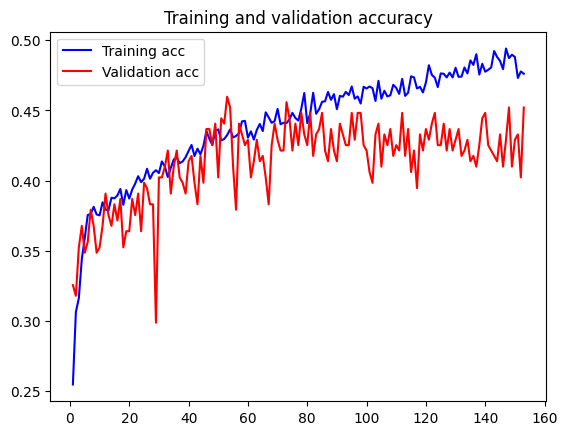

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

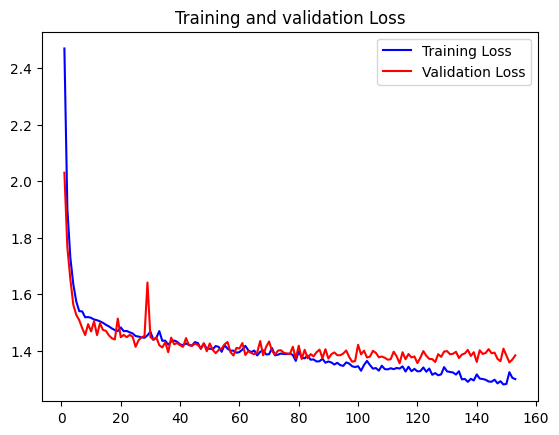

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/zrc_energy_melspectrogram_rolloff_chroma_mfcc100_tonnetz_contrast_flatness_bandwidth_LDA_model7.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(x_testcnn, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_lb, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       382
           1       0.36      0.15      0.21       381
           2       0.46      0.28      0.35       381
           3       0.38      0.48      0.43       382
           4       0.35      0.59      0.44       326
           5       0.53      0.58      0.55       381

    accuracy                           0.45      2233
   macro avg       0.45      0.45      0.43      2233
weighted avg       0.45      0.45      0.43      2233



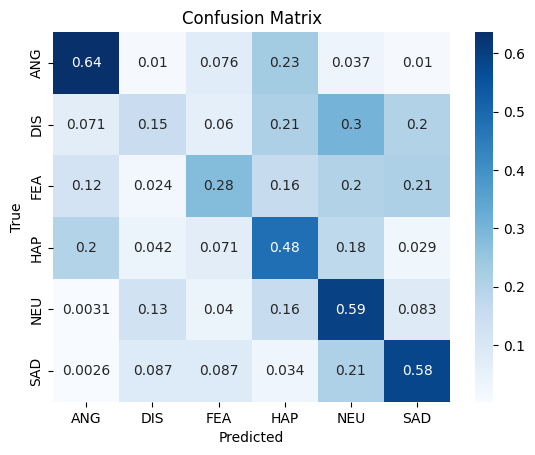

In [ ]:
cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comments
Most confusing classes are Disgust and Fear with 0.15 and 0.28 accuracy respectively.

### Using Augmented Training Data

#### Splitting

In [ ]:
# load the features from drive
CREMA_df_features_original = pd.read_csv('/content/drive/MyDrive/Kaggle_ds/features2/CREMA_df_features.csv')
CREMA_df_features_noise = pd.read_csv('/content/drive/MyDrive/Kaggle_ds/features2/CREMA_df_features_noise.csv')
CREMA_df_features_stretch = pd.read_csv('/content/drive/MyDrive/Kaggle_ds/features2/CREMA_df_features_stretch.csv')
CREMA_df_features_shift = pd.read_csv('/content/drive/MyDrive/Kaggle_ds/features2/CREMA_df_features_shift.csv')
CREMA_df_features_pitch = pd.read_csv('/content/drive/MyDrive/Kaggle_ds/features2/CREMA_df_features_pitch.csv')


In [ ]:
CREMA_df_features_original=add_column_names(CREMA_df_features_original,n=100)
CREMA_df_features_noise=add_column_names(CREMA_df_features_noise,n=100)
CREMA_df_features_stretch=add_column_names(CREMA_df_features_stretch,n=100)
CREMA_df_features_shift=add_column_names(CREMA_df_features_shift,n=100)
CREMA_df_features_pitch=add_column_names(CREMA_df_features_pitch,n=100)

CREMA_df_features_original=features_selector(CREMA_df_features_original,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,tonnetz=True,spectral_flatness=True,spectral_contrast=True,chroma=True,spectral_bandwidth=True)
CREMA_df_features_noise=features_selector(CREMA_df_features_noise,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,tonnetz=True,spectral_flatness=True,spectral_contrast=True,chroma=True,spectral_bandwidth=True)
CREMA_df_features_stretch=features_selector(CREMA_df_features_stretch,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,tonnetz=True,spectral_flatness=True,spectral_contrast=True,chroma=True,spectral_bandwidth=True)
CREMA_df_features_shift=features_selector(CREMA_df_features_shift,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,tonnetz=True,spectral_flatness=True,spectral_contrast=True,chroma=True,spectral_bandwidth=True)
CREMA_df_features_pitch=features_selector(CREMA_df_features_pitch,zrc=True,energy=True,mfcc=True,n=100,melspectrogram=True,spectral_rolloff=True,tonnetz=True,spectral_flatness=True,spectral_contrast=True,chroma=True,spectral_bandwidth=True)

In [ ]:
CREMA_df_labels_original = CREMA_df_features_original.iloc[:, -1]
CREMA_df_features_original = CREMA_df_features_original.iloc[:, :-1]
CREMA_df_features_noise = CREMA_df_features_noise.iloc[:, :-1]
CREMA_df_features_stretch = CREMA_df_features_stretch.iloc[:, :-1]
CREMA_df_features_shift = CREMA_df_features_shift.iloc[:, :-1]
CREMA_df_features_pitch = CREMA_df_features_pitch.iloc[:, :-1]

In [ ]:
lb = LabelEncoder()
CREMA_df_labels_original = lb.fit_transform(CREMA_df_labels_original)
for i in range(len(lb.classes_)):
    print(f'Label {lb.classes_[i]} mapped to {i}')

Label ANG mapped to 0
Label DIS mapped to 1
Label FEA mapped to 2
Label HAP mapped to 3
Label NEU mapped to 4
Label SAD mapped to 5


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(CREMA_df_features_original, CREMA_df_labels_original, test_size=0.3, random_state=SEED, stratify=CREMA_df_labels_original, shuffle=True)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.05, random_state=SEED, stratify=y_train_val, shuffle=True)
print(len(X_train))
print(len(X_val))
print(len(X_test))

4948
261
2233


In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
X_train.index

Int64Index([1527, 5562, 2407, 4530, 4093,  786,  459, 2836, 1186, 4207,
            ...
            1072, 5143, 2971, 3923, 2021, 3198, 1695, 4089, 3168, 6443],
           dtype='int64', length=4948)

In [ ]:
# Get the indices of the training set
train_indices = X_train.index
CREMA_df_features_noise_train = CREMA_df_features_noise.iloc[train_indices]
CREMA_df_features_stretch_train = CREMA_df_features_stretch.iloc[train_indices]
CREMA_df_features_shift_train = CREMA_df_features_shift.iloc[train_indices]
CREMA_df_features_pitch_train = CREMA_df_features_pitch.iloc[train_indices]

# add augmented rows
X_train = pd.concat([X_train, CREMA_df_features_noise_train, CREMA_df_features_stretch_train, CREMA_df_features_shift_train, CREMA_df_features_pitch_train], axis=0)
y_train = pd.concat([y_train] * 5, axis=0)

# Shuffle
indices = np.arange(len(X_train))
np.random.seed(SEED)
np.random.shuffle(indices)

X_train = X_train.iloc[indices].reset_index(drop=True)
y_train = y_train.iloc[indices].reset_index(drop=True)

In [ ]:
y_train_oe = np_utils.to_categorical(y_train)
y_val_oe = np_utils.to_categorical(y_val)
y_test_oe = np_utils.to_categorical(y_test)

#### Definitions

In [ ]:
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1



In [ ]:
def create_model0():
    model=Sequential()
    model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(258, 1)))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))

    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001
  )
    model.compile(loss = 'categorical_crossentropy',optimizer ='Adam',metrics = ['accuracy',get_f1])
    return model


#### Training

In [ ]:
# train model
model = create_model0()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=30, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/1d_augmented.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train, dtype=tensorflow.float32)
cnn_results=model.fit(X_train, y_train_oe,
                      batch_size=256,
                      epochs=1000,
                     validation_data = (X_val,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
 6/97 [>.............................] - ETA: 5s - loss: 2.8376 - accuracy: 0.1549 - get_f1: 0.0909

97/97 [==============================] - ETA: 0s - loss: 1.8567 - accuracy: 0.1873 - get_f1: 0.0059
Epoch 1: val_accuracy improved from -inf to 0.25670, saving model to /content/drive/MyDrive/Kaggle_ds/1d_augmented.best.hdf5
97/97 [==============================] - 19s 101ms/step - loss: 1.8567 - accuracy: 0.1873 - get_f1: 0.0059 - val_loss: 1.7427 - val_accuracy: 0.2567 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
96/97 [============================>.] - ETA: 0s - loss: 1.7682 - accuracy: 0.2047 - get_f1: 0.0139
Epoch 2: val_accuracy improved from 0.25670 to 0.30268, saving model to /content/drive/MyDrive/Kaggle_ds/1d_augmented.best.hdf5
97/97 [==============================] - 6s 66ms/step - loss: 1.7680 - accuracy: 0.2049 - get_f1: 0.0141 - val_loss: 1.7031 - val_accuracy: 0.3027 - val_get_f1: 0.0115 - lr: 0.0010
Epoch 3/1000
97/97 [==============================] - ETA: 0s - loss: 1.7586 - accuracy: 0.2268 - get_f1: 0.0216
Epoch 3: val_accuracy did not improve from 0.30268
97

#### Results

<Figure size 640x480 with 0 Axes>

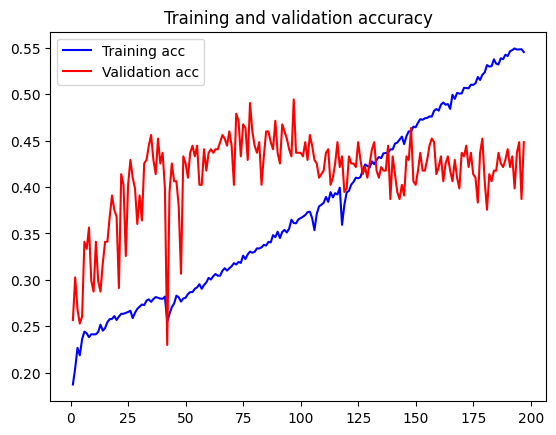

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

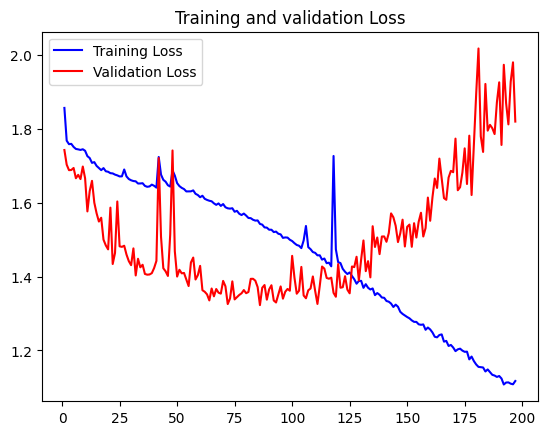

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

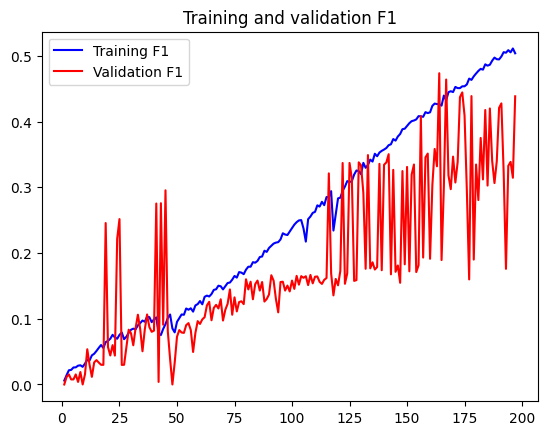

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()


In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/1d_augmented.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       382
           1       0.43      0.31      0.36       381
           2       0.43      0.39      0.41       381
           3       0.39      0.48      0.43       382
           4       0.40      0.45      0.43       326
           5       0.51      0.59      0.55       381

    accuracy                           0.47      2233
   macro avg       0.47      0.47      0.47      2233
weighted avg       0.48      0.47      0.47      2233



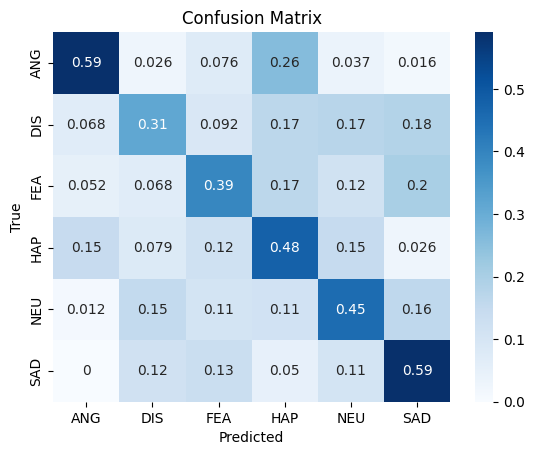

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Comment
Disgust and Fear remain the most confusing classes even after the use of augmentation.

Augmentation did not improve the overall accuracy or f1-score.